# Credit Analysis EDA

## Introduction


This case study is to analyze and interpret the patterns hidden in bank loan application data.
With the use of data analysis skills, we have to determine how an application can be a potential profit or loss for the banks.


### Problem Statement

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

 * If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

 * If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### Business Understanding


The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers.You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##### Suppress warnings, just in case...

In [2]:
import warnings
warnings.filterwarnings('ignore')

##### Loading application dataset

In [3]:
app = pd.read_csv("application_data.csv")

### Initial data inspection

In [4]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
app.shape

(307511, 122)

In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [8]:
app.describe(include="all")

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

In [9]:
app.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [10]:
app.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

### Checking missing values in the application dataset

##### Checking Percentage of nulls in each columns and sorting the result in descending order

In [11]:
df_missing_pc = (100*app.isnull().sum()/app.shape[0]).sort_values(ascending=False)
df_missing_pc

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

##### Selecting the columns having more than 50 percent null values to be dropped

In [12]:
df_toDrop = df_missing_pc[df_missing_pc>50]
len(df_toDrop)

41

In [13]:
df_toDrop

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_AVG           55.179164
NONLIVINGARE

##### So,these 41 columns will be dropped as they have more than 50% null values, which may skew our analysis.

In [14]:
df = app.drop(columns=df_toDrop.index)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 81 columns]

#### Now, checking columns with more than 40 % nulls

In [15]:
df_missing_pc = (100*df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
df_missing_pc

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
                                  ...    
NAME_HOUSING_TYPE                0.000000
NAME_FAMILY_STATUS               0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_INCOME_TYPE                 0.000000
SK_ID_CURR                       0.000000
Length: 81, dtype: float64

In [16]:
df_toDrop = df_missing_pc[df_missing_pc>40]
df_toDrop

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
dtype: float64

#### As, these columns are not required for analysis of loan defaulters, we will drop these 

In [17]:
df = df.drop(columns=df_toDrop.index)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

* Dataframe(named df) contains relevant columns with less than 50% null values
* So, we have to check each column one by one and see how nulls can be handled 

##### Checking Percentage of nulls in each columns and sorting the result in descending order

In [18]:
(100*df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

##### As we see, 31% is the maximum null percent that a column has, so we cannot drop any more columns without checking about what the data contains...
Lets check all the colums that have missing values one by one

##### Start with OCCUPATION_TYPE column

In [19]:
df.OCCUPATION_TYPE.isnull().sum()

96391

In [20]:
df.OCCUPATION_TYPE.dtype

dtype('O')

In [21]:
df.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

##### As the number of missing values are much more than the highest occuring value, we will impute "Others" into missing values as it is a categorical variable

In [22]:
df.OCCUPATION_TYPE = df.OCCUPATION_TYPE.fillna("Other")

In [23]:
df.OCCUPATION_TYPE.isnull().sum()

0

##### So, now there are no missing values in occupation_type column

##### Now, lets work on EXT_SOURCE_3 column

In [24]:
df.EXT_SOURCE_3.isnull().sum()

60965

In [25]:
df.EXT_SOURCE_3.dtypes

dtype('float64')

<AxesSubplot:xlabel='EXT_SOURCE_3'>

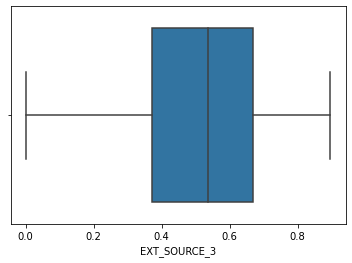

In [26]:
sns.boxplot(df.EXT_SOURCE_3)

In [27]:
df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

##### As, mean and median appears comparable, we will impute missing values with median value, as it is a numerical variable

In [28]:
df.EXT_SOURCE_3.fillna(df.EXT_SOURCE_3.median(),inplace=True)

In [29]:
df.EXT_SOURCE_3.isnull().sum()

0

Missing values handled for EXT_SOURCE_3 column.

##### now, lets work with AMT_REQ_CREDIT_BUREAU_YEAR column

In [30]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.isna().sum()

41519

In [31]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

We have a few more similar columns with same missing percentage

In [32]:
null_cols = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

Lets check the statistical distribution of these columns

In [33]:
df[null_cols].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

* most of these columns have mostly zeros and some non-zero values
* we can decide between:
    * keep them and use median to fill the missing values
    * drop these columns

##### For this analysis, I am going with imputauion 

In [34]:
df.fillna(df[null_cols].median(),inplace=True)

##### Lets check the dataset once again

In [35]:
(100*df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
                                 ...   
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
TARGET                         0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 73, dtype: float64

##### imputing missing values in NAME_TYPE_SUITE column

In [36]:
df.NAME_TYPE_SUITE.isnull().sum()

1292

In [37]:
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

As this is a categorical variable and has few missing values when compared to mode, we can impute using mode

In [38]:
df.NAME_TYPE_SUITE.fillna("Unaccompanied",inplace=True)

In [39]:
df.NAME_TYPE_SUITE.isnull().sum()

0

##### checking OBS_30_CNT_SOCIAL_CIRCLE column 

In [40]:
df.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [41]:
df.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

these missing values can be filled with median.
There are other columns of same type, lets do the same with all of them 

In [42]:
df[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]]=df[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]].fillna(df[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]].median())

##### Lets check the dataset for missing values once again

In [43]:
(100*df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
                                 ...   
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 73, dtype: float64

##### Imputing missing values of EXT_SOURCE_2 column

In [44]:
df.EXT_SOURCE_2.isnull().sum()

660

<AxesSubplot:xlabel='EXT_SOURCE_2'>

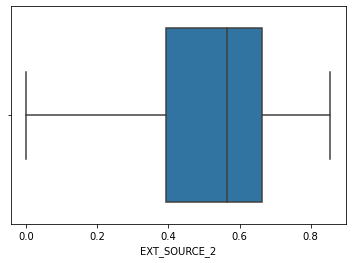

In [45]:
sns.boxplot(df.EXT_SOURCE_2)

##### As this is a numerical variable, we can impute using median

In [46]:
df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_2.median,inplace=True)

In [47]:
df.EXT_SOURCE_2.isnull().sum()

0

##### imputing missing values of AMT_GOODS_PRICE column

In [48]:
df.AMT_GOODS_PRICE.isnull().sum()

278

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

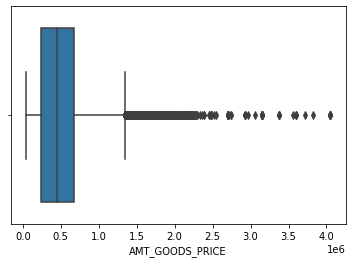

In [49]:
sns.boxplot(df.AMT_GOODS_PRICE)

using **median** to impute in this column as it is a **numerical variable** and has very few missing values

In [50]:
df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.median(),inplace=True)

In [51]:
df.AMT_GOODS_PRICE.isnull().sum()

0

##### Now, checking AMT_ANNUITY column

In [52]:
df.AMT_ANNUITY.isnull().sum()

12

<AxesSubplot:xlabel='AMT_ANNUITY'>

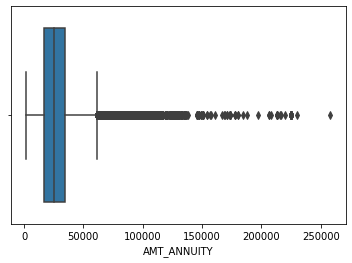

In [53]:
sns.boxplot(df.AMT_ANNUITY)

imputing with median

In [54]:
df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.median(),inplace=True)

In [55]:
df.AMT_ANNUITY.isnull().sum()

0

##### Imputing missing values of CNT_FAM_MEMBERS column

In [56]:
df.CNT_FAM_MEMBERS.isnull().sum()

2

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='Density'>

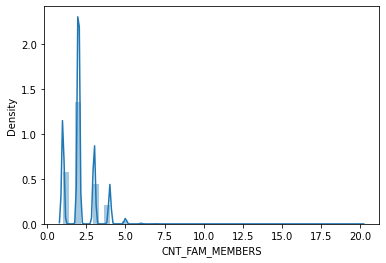

In [57]:
sns.distplot(df.CNT_FAM_MEMBERS)

In [58]:
df.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

As we see, majority of applicants have CNT_FAM_MEMBERS as 2, so we fill the same for missing entries

In [59]:
df.CNT_FAM_MEMBERS.fillna(2,inplace=True)

In [60]:
df.CNT_FAM_MEMBERS.isnull().sum()

0

##### Imputing null values in DAYS_LAST_PHONE_CHANGE column

In [61]:
df.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [62]:
df.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [63]:
df.DAYS_LAST_PHONE_CHANGE.fillna(0,inplace=True)

In [64]:
df.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

##### Lets see the dataset nulls, should be 0

In [65]:
df.isnull().sum().sort_values(ascending=False)

SK_ID_CURR                    0
REG_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_8               0
FLAG_DOCUMENT_7               0
FLAG_DOCUMENT_6               0
                             ..
FLAG_CONT_MOBILE              0
FLAG_WORK_PHONE               0
FLAG_EMP_PHONE                0
FLAG_MOBIL                    0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### So, all null values are treated now

### Now, lets start with data quality check

In [67]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         1.0  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [69]:
df.EXT_SOURCE_2

0         0.262949
1         0.622246
2         0.555912
3         0.650442
4         0.322738
            ...   
307506    0.681632
307507    0.115992
307508    0.535722
307509    0.514163
307510    0.708569
Name: EXT_SOURCE_2, Length: 307511, dtype: object

##### EXT_SOURCE_2 contains float values, but is listed as object type, lets convert it into float 

In [70]:
df.EXT_SOURCE_2 = pd.to_numeric(df.EXT_SOURCE_2,errors="coerce")

In [71]:
df.EXT_SOURCE_2

0         0.262949
1         0.622246
2         0.555912
3         0.650442
4         0.322738
            ...   
307506    0.681632
307507    0.115992
307508    0.535722
307509    0.514163
307510    0.708569
Name: EXT_SOURCE_2, Length: 307511, dtype: float64

##### Changing DAYS_BITRH column to Age in years

In [72]:
df["Age"] = round(-1*df.DAYS_BIRTH/365,0)

In [73]:
df.Age.describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: Age, dtype: float64

In [74]:
df[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH","DAYS_REGISTRATION","DAYS_LAST_PHONE_CHANGE"]].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_REGISTRATION  \
count  307511.000000  307511.000000    307511.000000      307511.000000   
mean   -16036.995067   63815.045904     -2994.202373       -4986.120328   
std      4363.988632  141275.766519      1509.450419        3522.886321   
min    -25229.000000  -17912.000000     -7197.000000      -24672.000000   
25%    -19682.000000   -2760.000000     -4299.000000       -7479.500000   
50%    -15750.000000   -1213.000000     -3254.000000       -4504.000000   
75%    -12413.000000    -289.000000     -1720.000000       -2010.000000   
max     -7489.000000  365243.000000         0.000000           0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean              -962.855657  
std                826.808966  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

##### Similarly, Converting other days variable to years

In [75]:
#making all the values positive 
df[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH","DAYS_REGISTRATION","DAYS_LAST_PHONE_CHANGE"]] =abs(df[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH","DAYS_REGISTRATION","DAYS_LAST_PHONE_CHANGE"]]) 

In [76]:
#converting into years
for x in df.columns:
    if "DAYS" in x:
        name="YEARS("+x+")"
        df[name] = round(df[x]/365,2)

In [77]:
df[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH","DAYS_REGISTRATION","DAYS_LAST_PHONE_CHANGE"]].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_REGISTRATION  \
count  307511.000000  307511.000000    307511.000000      307511.000000   
mean    16036.995067   67724.742149      2994.202373        4986.120328   
std      4363.988632  139443.751806      1509.450419        3522.886321   
min      7489.000000       0.000000         0.000000           0.000000   
25%     12413.000000     933.000000      1720.000000        2010.000000   
50%     15750.000000    2219.000000      3254.000000        4504.000000   
75%     19682.000000    5707.000000      4299.000000        7479.500000   
max     25229.000000  365243.000000      7197.000000       24672.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean               962.855657  
std                826.808966  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

In [78]:
df[["YEARS(DAYS_BIRTH)","YEARS(DAYS_EMPLOYED)","YEARS(DAYS_ID_PUBLISH)","YEARS(DAYS_REGISTRATION)","YEARS(DAYS_LAST_PHONE_CHANGE)"]].describe()

YEARS(DAYS_BIRTH)  YEARS(DAYS_EMPLOYED)  YEARS(DAYS_ID_PUBLISH)  \
count      307511.000000         307511.000000           307511.000000   
mean           43.936976            185.548007                8.203299   
std            11.956135            382.039306                4.135474   
min            20.520000              0.000000                0.000000   
25%            34.010000              2.560000                4.710000   
50%            43.150000              6.080000                8.920000   
75%            53.920000             15.640000               11.780000   
max            69.120000           1000.670000               19.720000   

       YEARS(DAYS_REGISTRATION)  YEARS(DAYS_LAST_PHONE_CHANGE)  
count             307511.000000                  307511.000000  
mean                  13.660596                       2.637965  
std                    9.651742                       2.265223  
min                    0.000000                       0.000000  
25%                    5.510000                       0.750000  
50%                   12.340000                       2.070000  
75%                   20.490000                       4.300000  
max                   67.590000                      11.760000

### Binning Columns for better readibility

Binning **Age** column

In [79]:
df['Age_Group'] = pd.cut(df['Age'],bins=[0,20,25,30,35,40,45,50,55,60,65,70],
                                              labels=["0-20",'20-25','25-30','30-35','35-40','40-45','45-50','50-55',
                                                      '55-60','60-65','above 65'])

<AxesSubplot:>

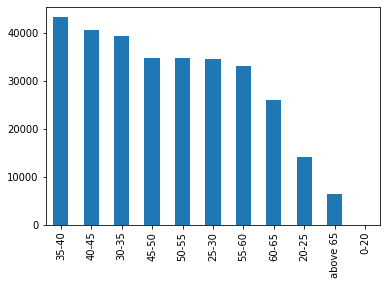

In [80]:
df.Age_Group.value_counts().plot.bar()

#### binning AMT_CREDIT column

In [81]:
df['AMT_CREDIT_buckets'] = pd.cut(df['AMT_CREDIT'],
                                  bins = [0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000], 
                                  labels = ['0-5L','5-10L','10-15L','15-20L','20-25L','25-30L',
                                            '30-35L','35-40L','Above 40L'])

<AxesSubplot:>

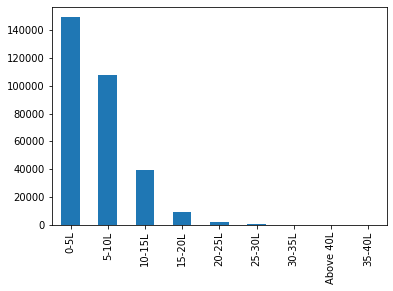

In [82]:
df.AMT_CREDIT_buckets.value_counts().plot.bar()

#### Binning AMT_INCOME_TOTAL column

In [83]:
df['AMT_INCOME_TOTAL_buckets'] = pd.cut(df['AMT_INCOME_TOTAL'],
                                                  bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,10000000], 
                                                  labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L',
                                                            '8-9L','9-10L','Above 10L'])

<AxesSubplot:>

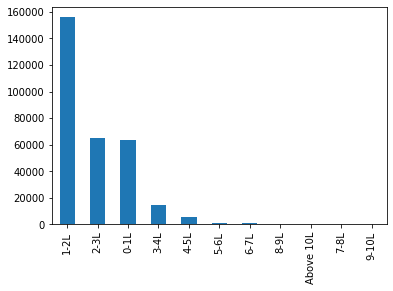

In [84]:
df.AMT_INCOME_TOTAL_buckets.value_counts().plot.bar()

### 
### Checking for outliers in the dataset

In [85]:
# function to plot boxplot and distplot
def plotter(dataframe, column):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=dataframe, x=column, orient='v').set(title=f'Box Plot for {column}')
    plt.subplot(1, 2, 2)
    sns.distplot(dataframe[column].dropna()).set(title=f'Distplot for {column}')
    plt.show()
    

#### Outlier check for AMT_INCOME_TOTAL column

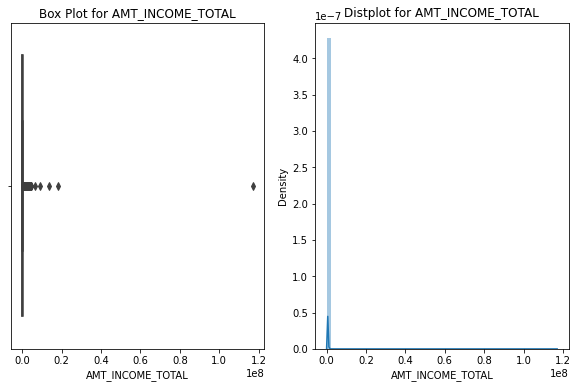

In [86]:
plotter(df,"AMT_INCOME_TOTAL")

### Observation
**AMT_INCOME_TOTAL** is highly skewed because of **outliers** as there are some extremely high values in the dataset
* This can be removed by capping.
* We can cap for maximum 95%ile and remove any higher value by replacing it with capped value

#### Outlier check for AMT_ANNUITY column

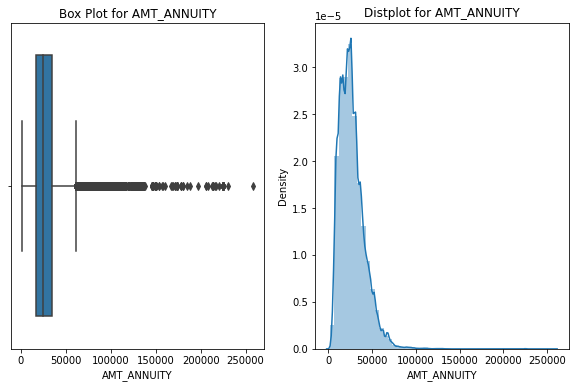

In [87]:
plotter(df,"AMT_ANNUITY")

### Observation
**AMT_ANNUITY** is also infected with **outliers**
* This can be removed by capping.
* We can cap for maximum 95%ile and remove any higher value by replacing it with capped value

#### Outlier check for CNT_CHILDREN column

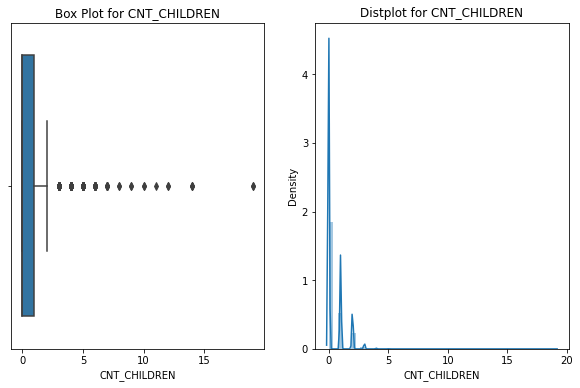

In [88]:
plotter(df,"CNT_CHILDREN")

In [89]:
df.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

#### Observation
**CNT_CHILDERN** also contains **outliers**
* Majority of the applicants have 0 or 1 children, but some have more than 10, even up to 19
* This can be removed by capping.
* We can cap for maximum 95%ile and remove any higher value

#### Outlier check for AMT_GOODS_PRICE column

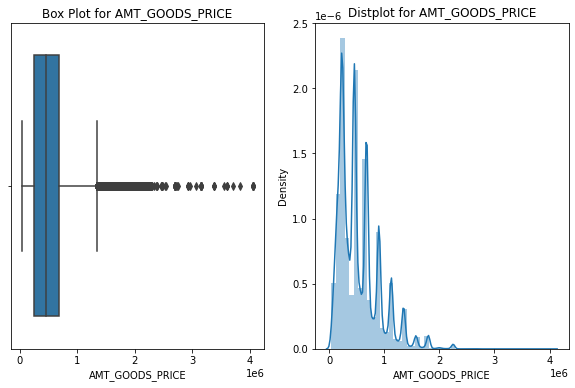

In [90]:
plotter(df,"AMT_GOODS_PRICE")

#### AMT_GOODS_PRICE also contains outliers
* Lets treat these outliers using capping
* plot graphs before and after outlier treatment

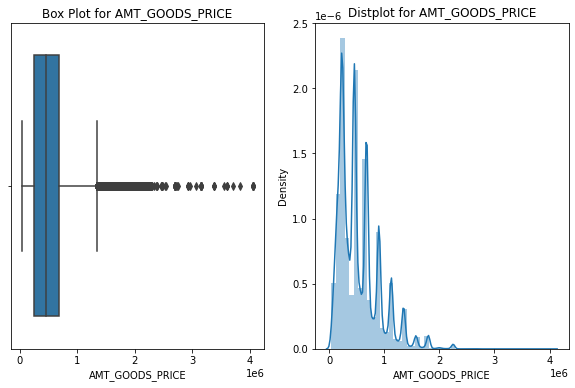

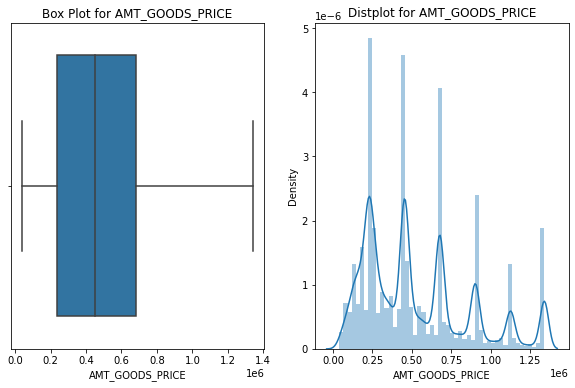

In [91]:
x="AMT_GOODS_PRICE"
plotter(df,x)       #before outlier treatment
q1=df[x].describe()["25%"]
q3=df[x].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df[x]=np.where(df[x]<lower_bound,lower_bound,df[x])
df[x]=np.where(df[x]>upper_bound,upper_bound,df[x])
plotter(df,x)       # after outlier treatment

#### Now, the outliers are removed from AMT_GOODS_Price column

**Binning** AMT_GOODS_PRICE column into different price buckets

In [92]:
df.AMT_GOODS_PRICE

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

In [93]:
df["Price_bucket"] = pd.cut(
df["AMT_GOODS_PRICE"],
    bins=[0,200000,400000,600000,800000,1000000,1200000],
    labels=['0-2L','2-4L','4-6L','6-8L','8-10L','10L+'])

<AxesSubplot:>

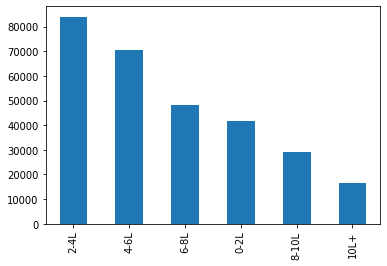

In [94]:
df["Price_bucket"].value_counts().plot.bar()

### Checking the TARGET variable

In [95]:
#Imbalance Percentage
df.TARGET.value_counts(normalize=False)

0    282686
1     24825
Name: TARGET, dtype: int64

In [96]:
imb_per = df.TARGET.value_counts(normalize=False)[1]/df.TARGET.value_counts(normalize=False)[0]
imb_per

0.08781828601345662

## imbalance percent = 0.088

<AxesSubplot:xlabel='TARGET', ylabel='count'>

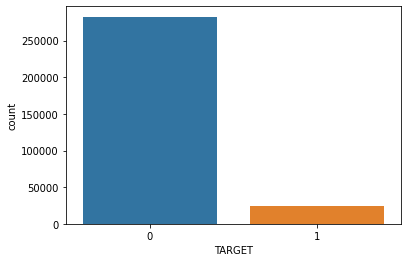

In [97]:
sns.countplot(df.TARGET)

<AxesSubplot:ylabel='TARGET'>

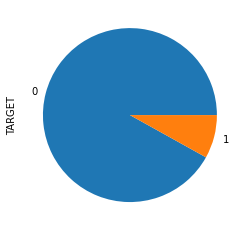

In [98]:
df.TARGET.value_counts().plot.pie()

* We can see, Target variable his highly imbalanced
* Only around 8% applications have Payment Difficulty.
* So, we will split the dataset into two sub-datasets :
    * df where TARGET=1
    * df where TARGET=2

In [99]:
df0 = df[df.TARGET==0]
df1 = df[df.TARGET==1]

## Now, lets do the analysis

#### Firstly, we will do univariate analysis on categorical columns

In [100]:
def target_with_cat(col):
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(30,12))
    #plotting for target=1
    sns.countplot(x=col, data=df1,ax=ax1,linewidth=1)
    ax1.set_ylabel('Count',fontsize=20)
    ax1.set_title(f'Distribution of {col} for Target = 1 ',fontsize=20)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=35, ha="right",fontsize=20)
    
    #normalized percentage on top of bars
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(df1))*100),
                     (p.get_x()+0.4, p.get_height()+100),
                     ha='center',fontsize=20)
    #plotting for target=0    
    sns.countplot(x=col, data=df0,ax=ax2,linewidth=1)
    ax2.set_ylabel('Count',fontsize=20)
    ax2.set_title(f'Distribution of {col} for Target = 0',fontsize = 20)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=35, ha="right",fontsize=20)
    
    #normalized percentage on top of bars
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(df0))*100), 
                     (p.get_x()+0.4, p.get_height()+100), 
                     ha='center',fontsize=20)
    
    plt.show()

#### Analysing all relevant categorical columns with target variable

In [101]:
cat_cols = ["CNT_CHILDREN","NAME_CONTRACT_TYPE","CODE_GENDER","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","Age_Group","AMT_INCOME_TOTAL_buckets","AMT_CREDIT_buckets","Price_bucket"]

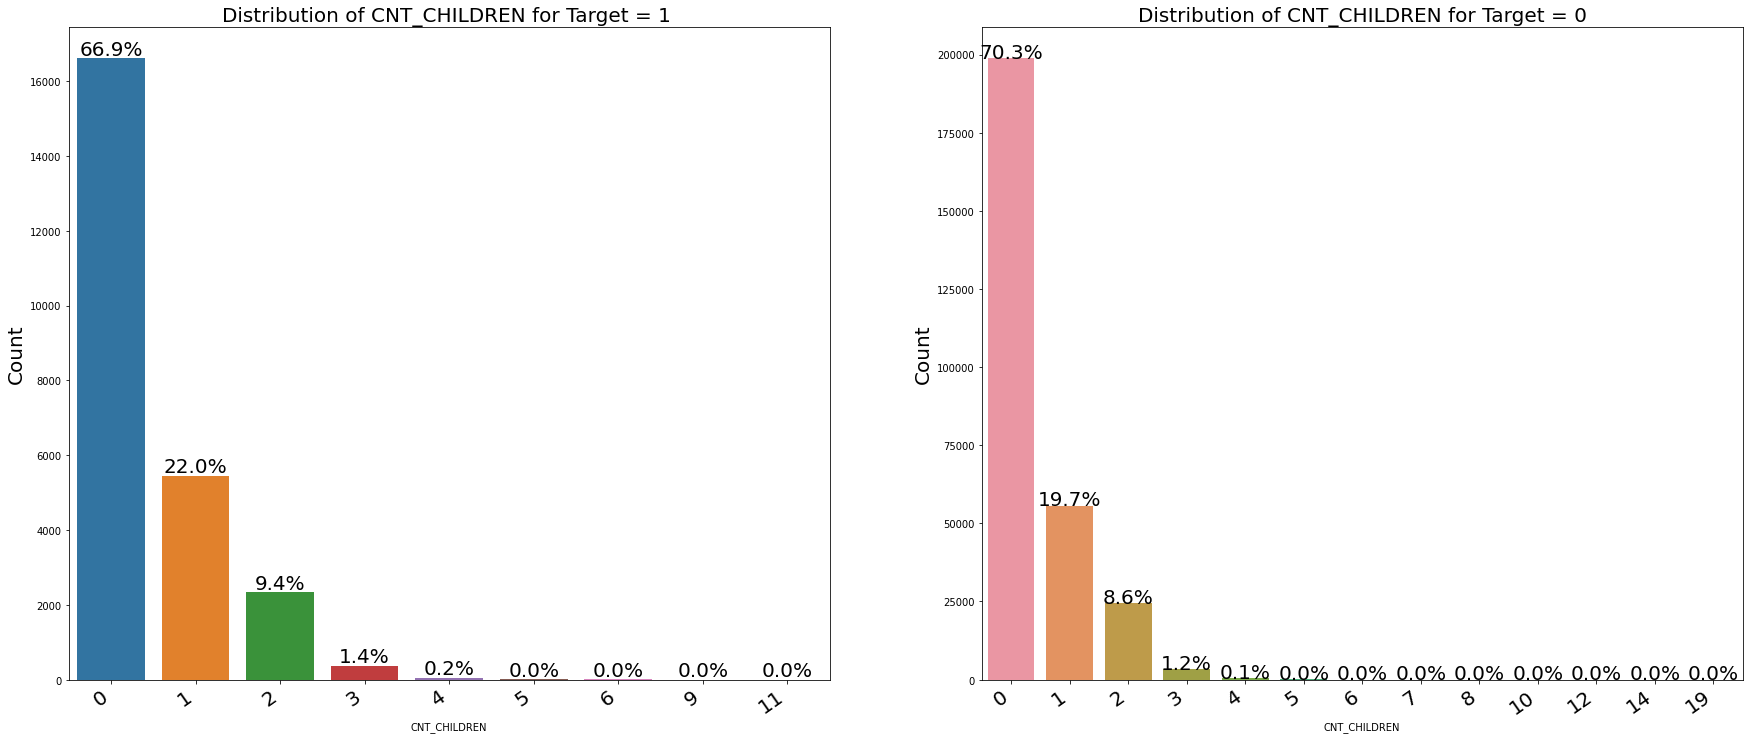

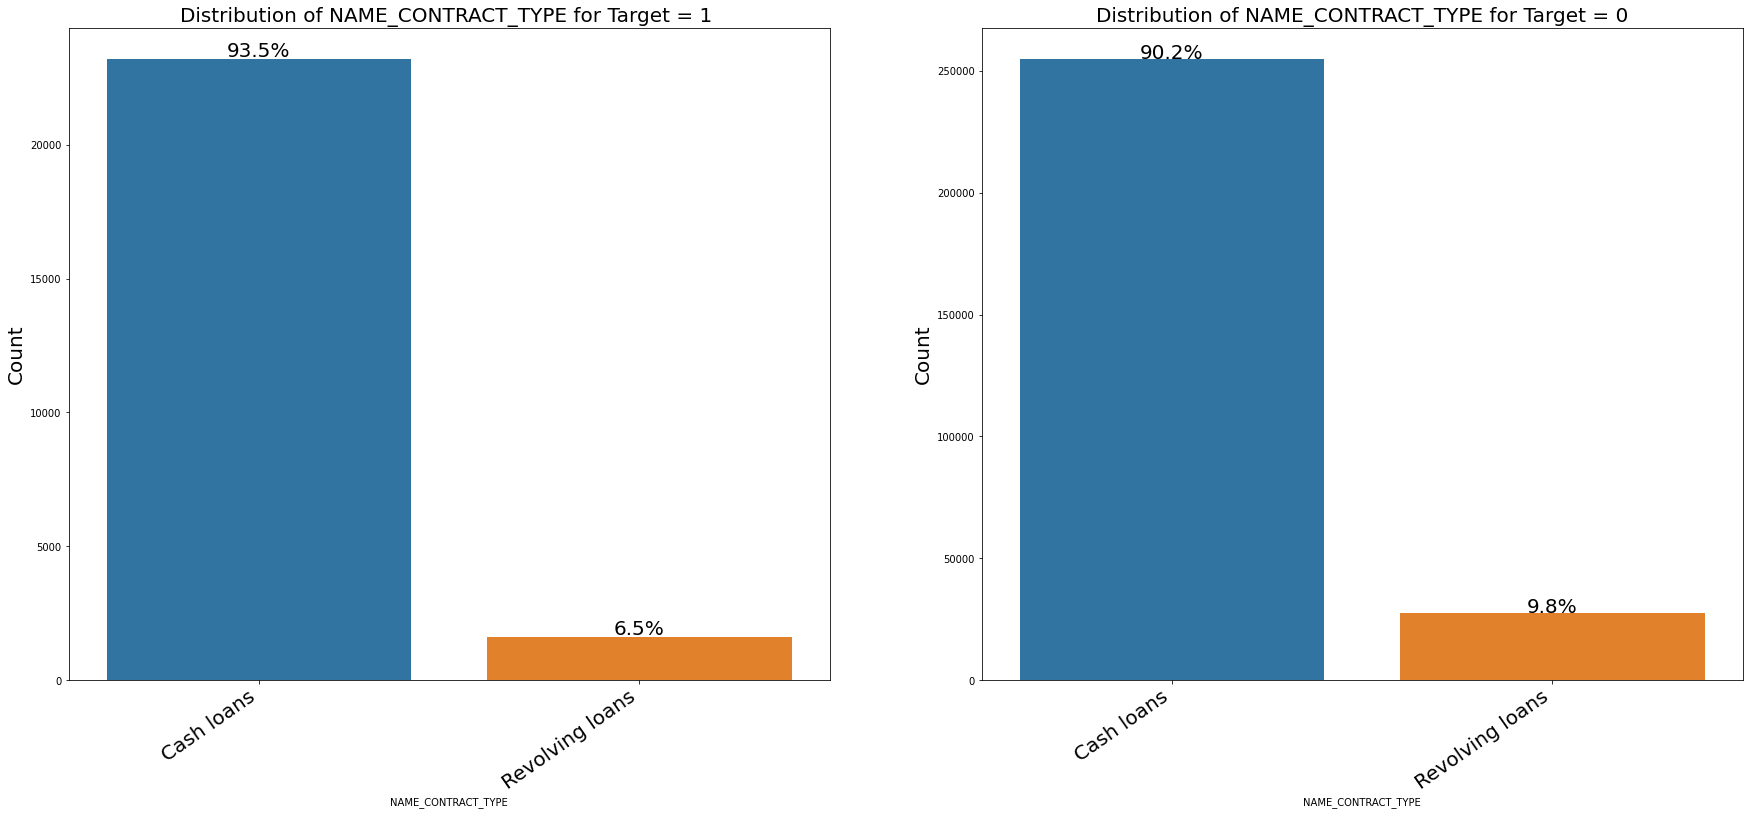

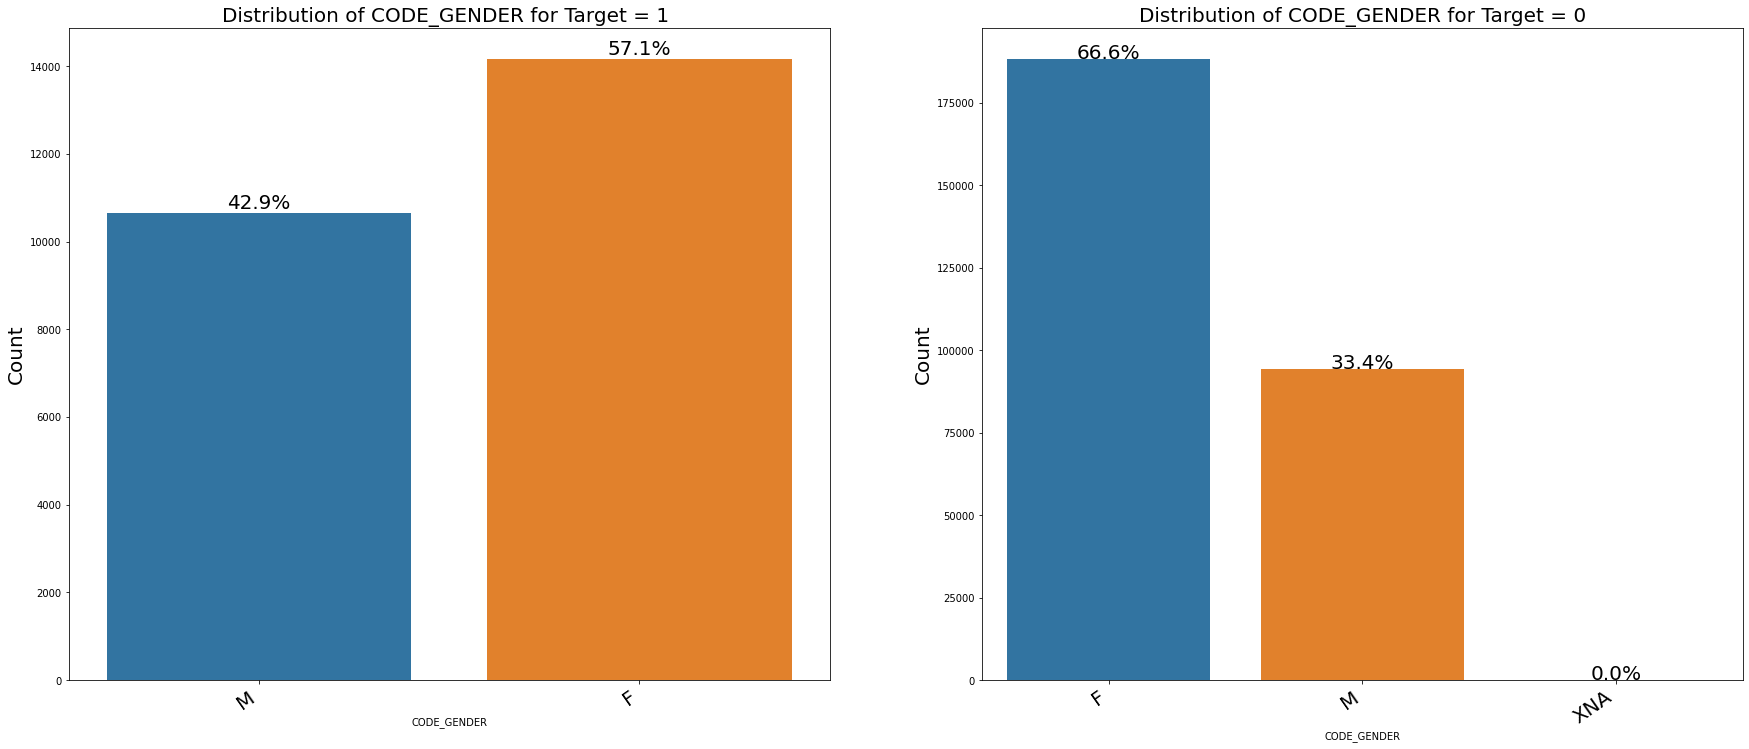

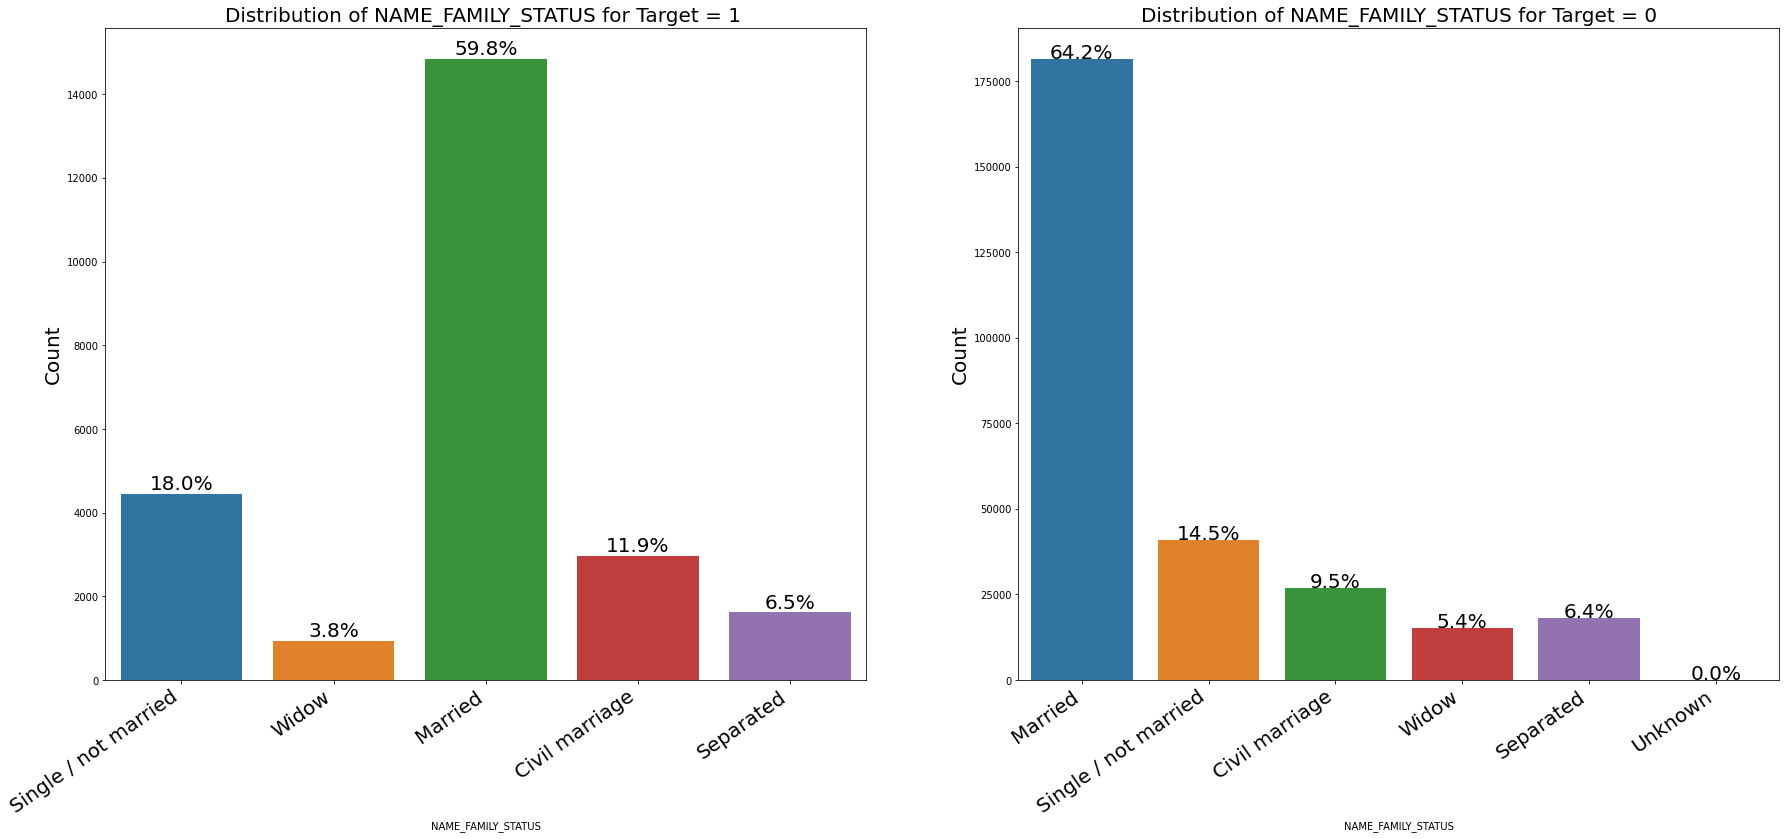

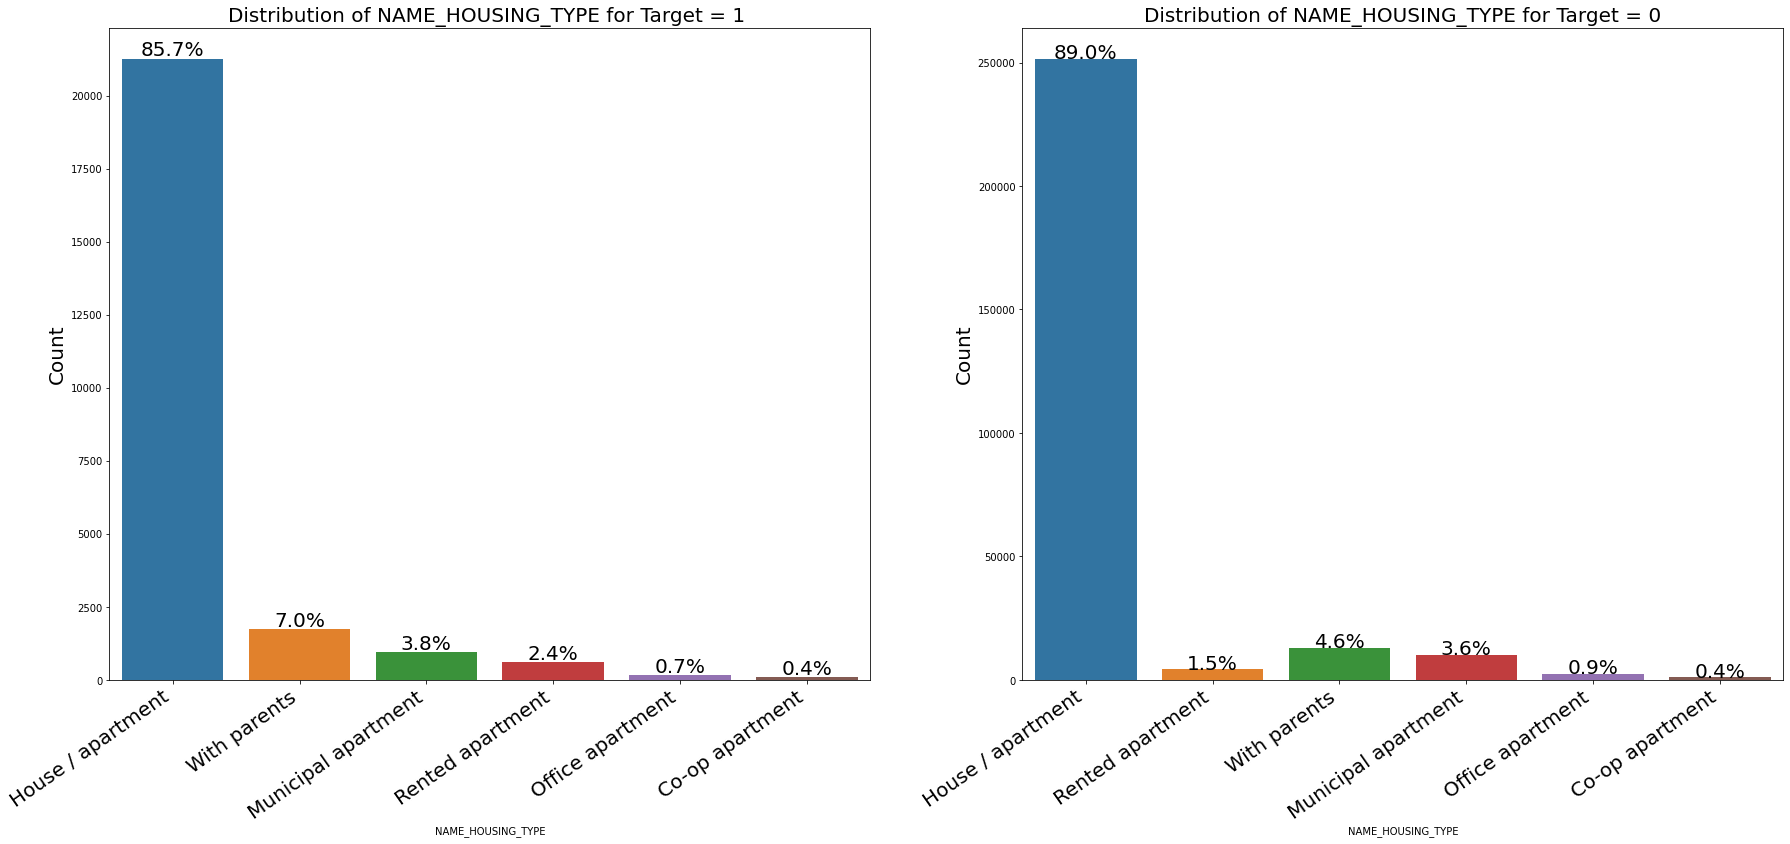

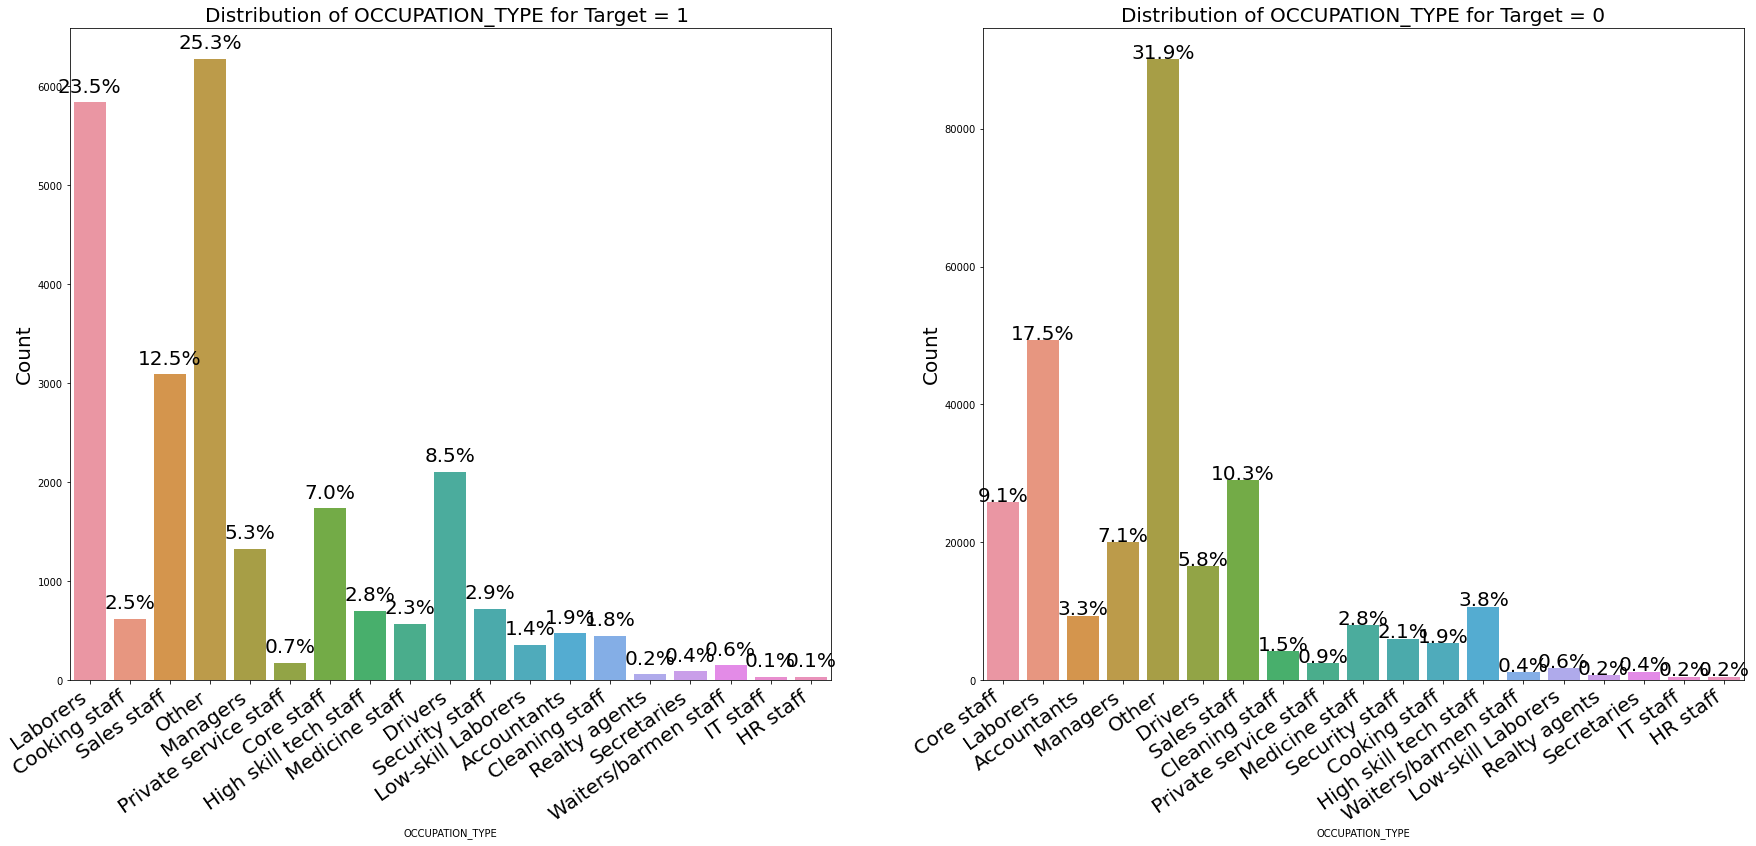

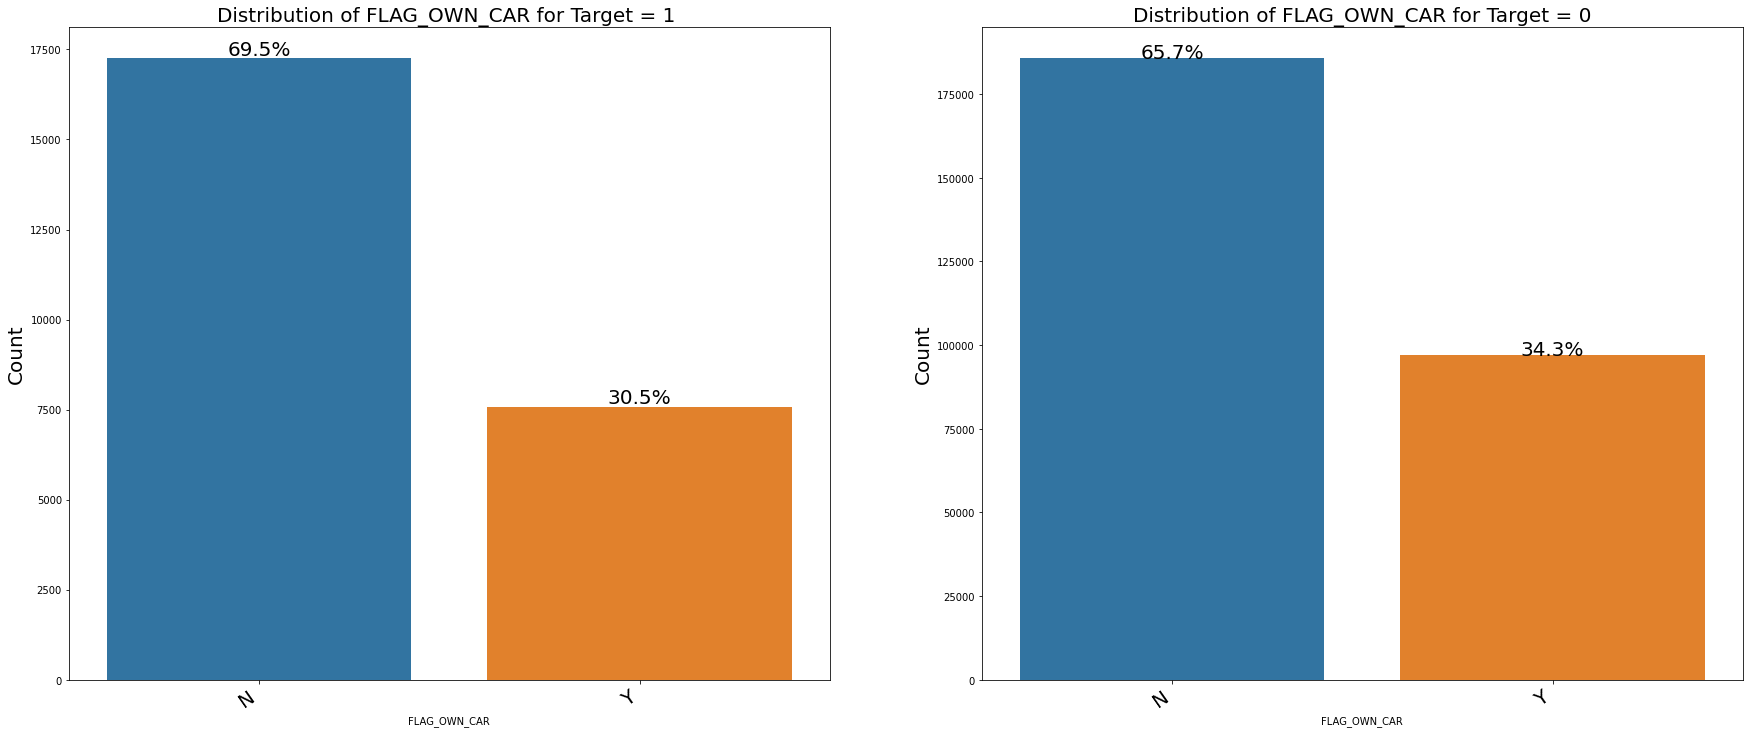

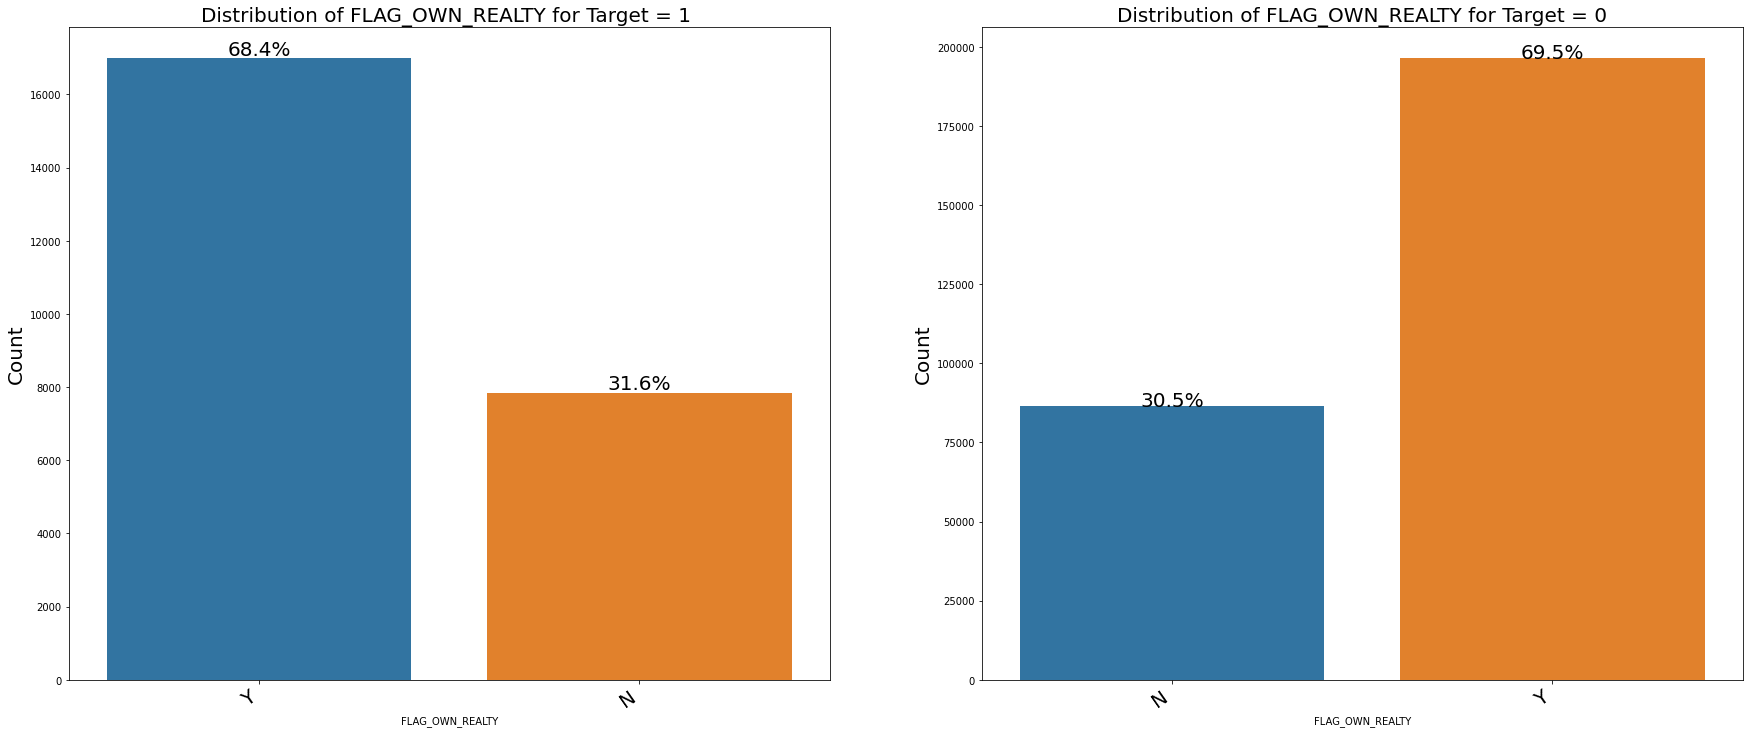

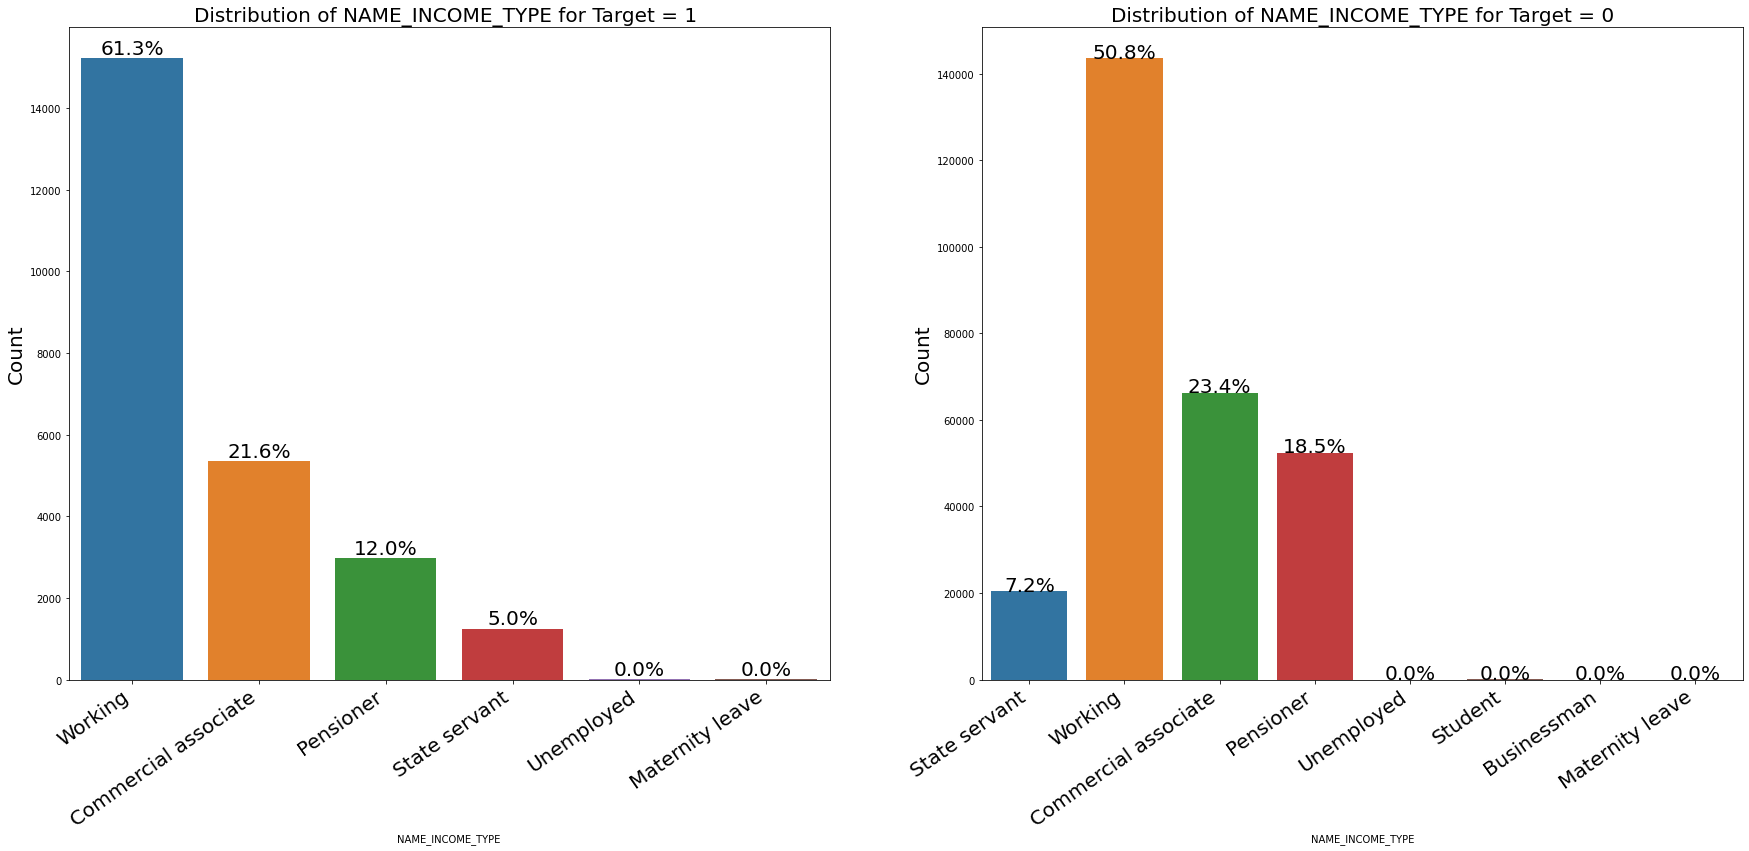

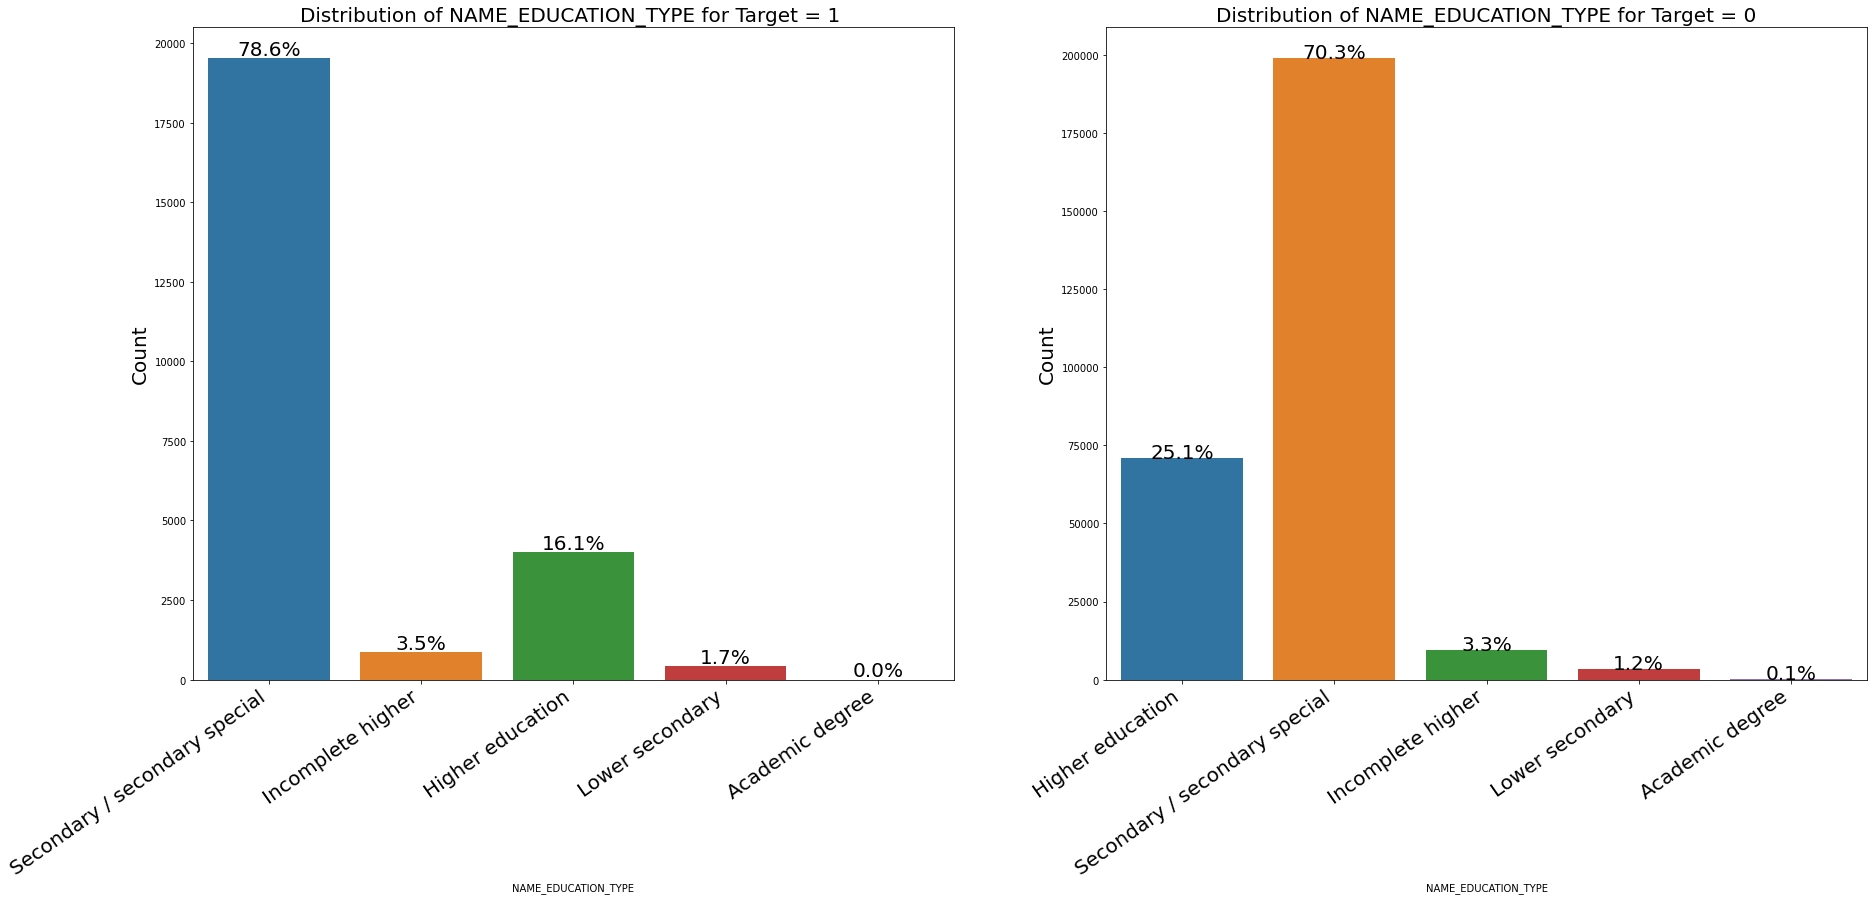

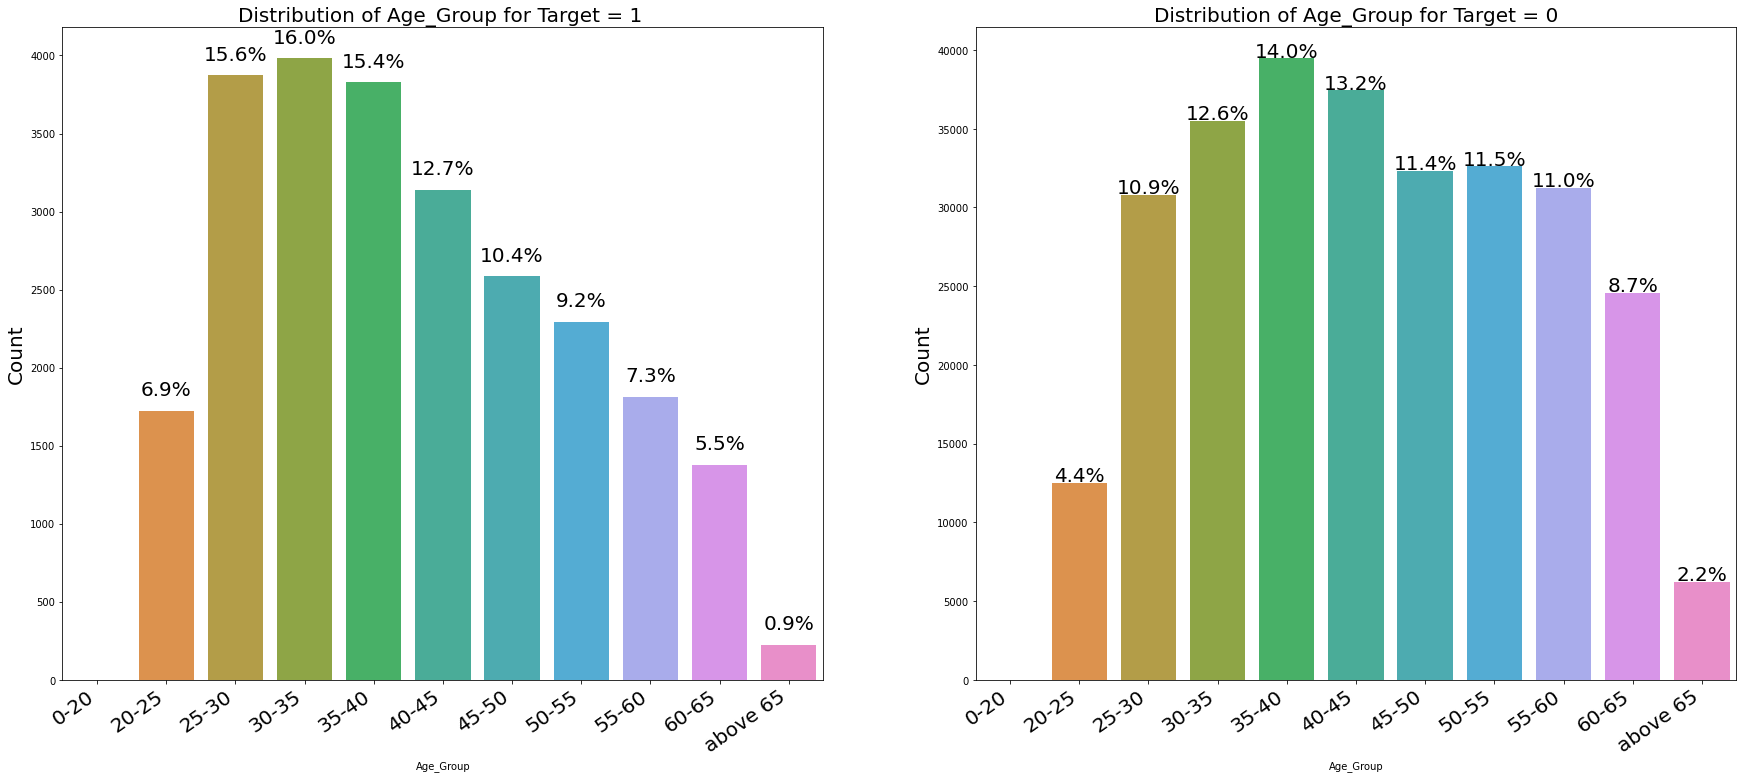

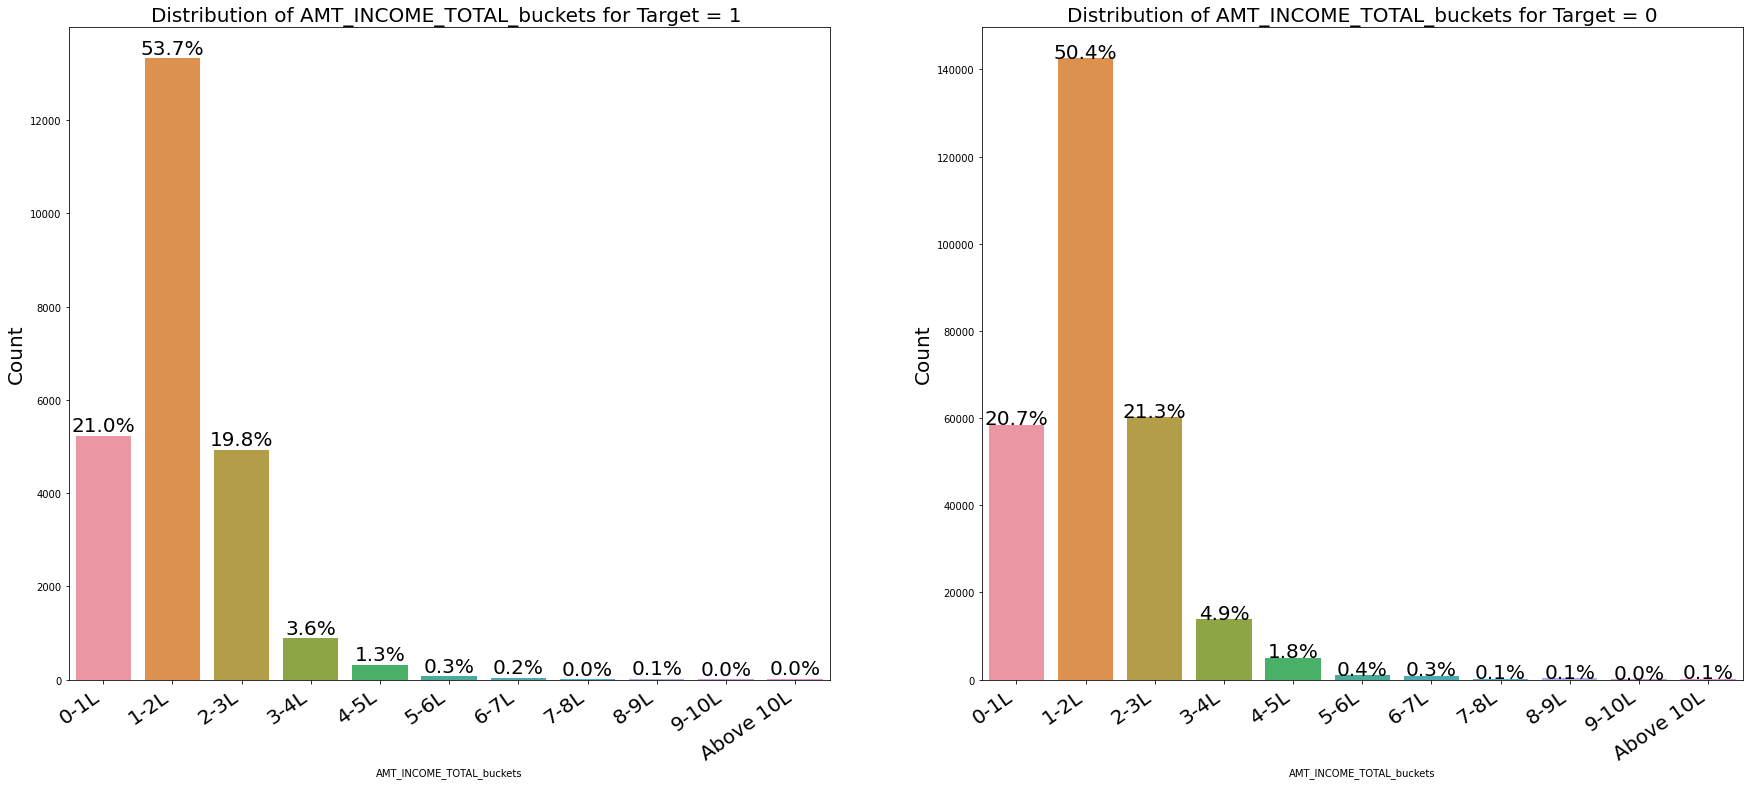

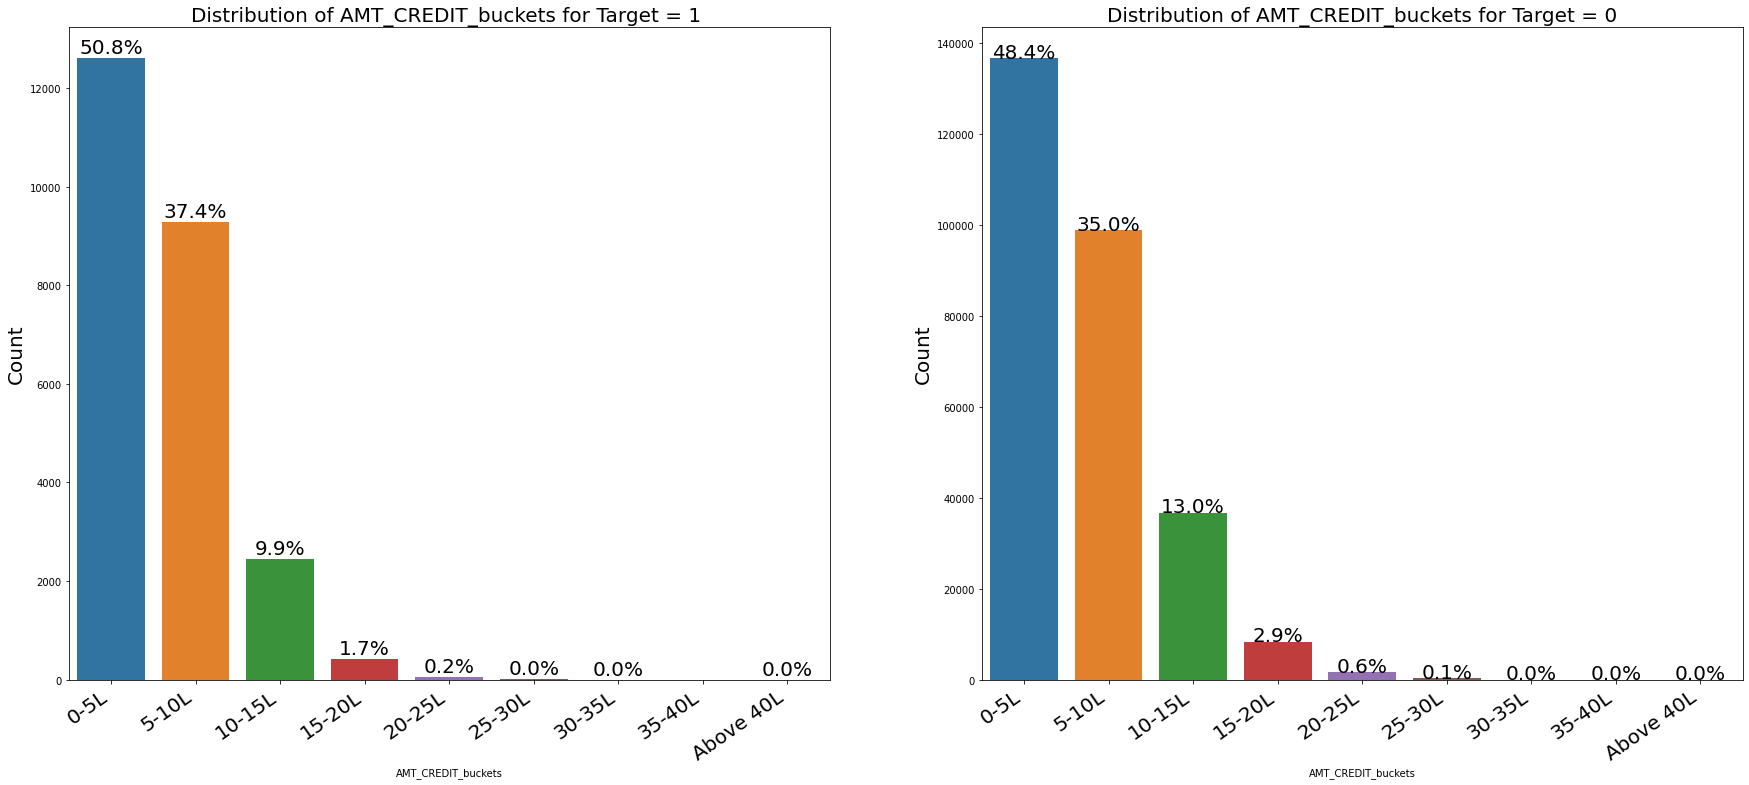

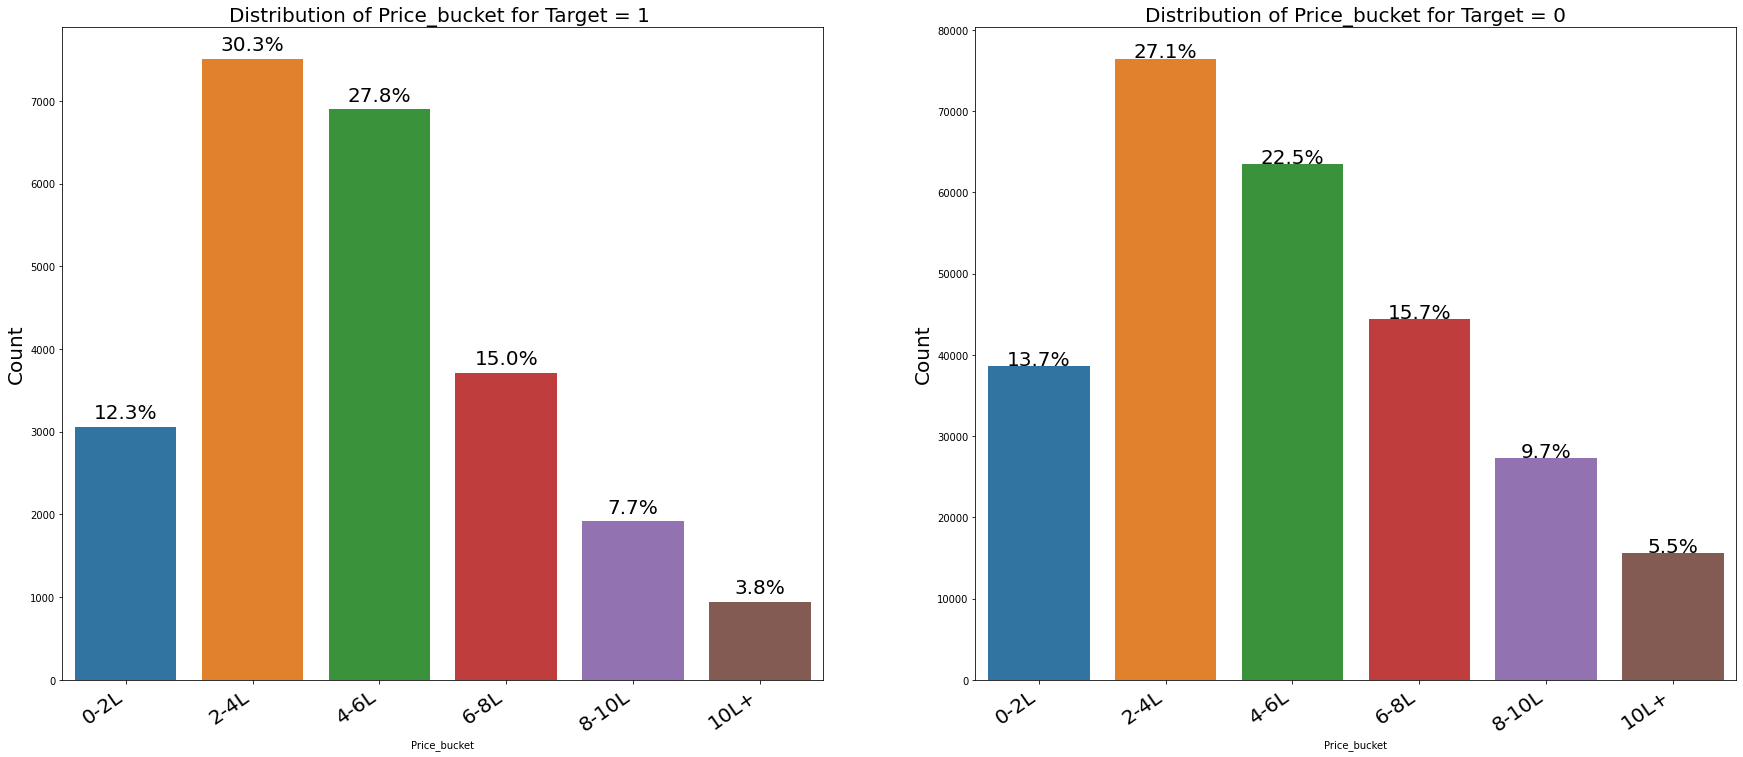

In [102]:
for x in cat_cols:
    target_with_cat(x)

plotting graph for ORGANIZATION_TYPE column

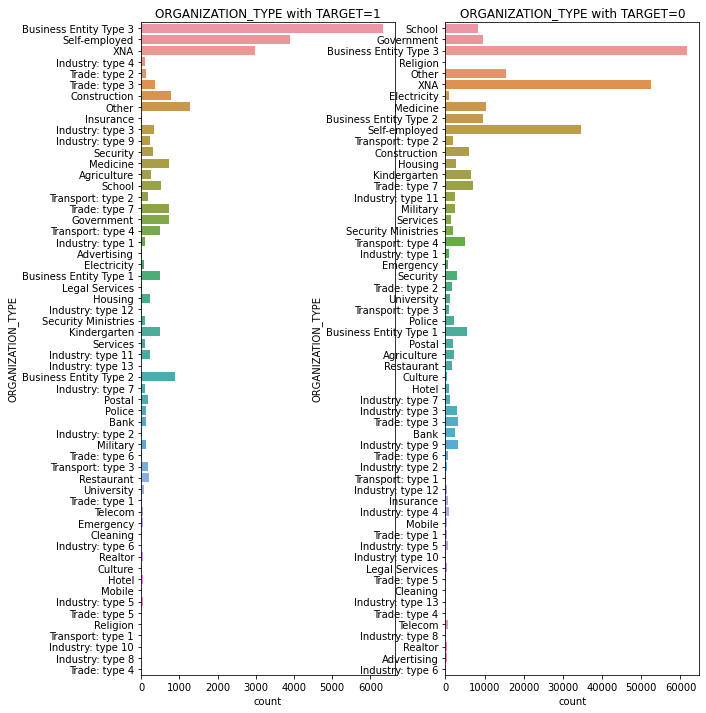

In [103]:
plt.figure(figsize=(10,12))
col="ORGANIZATION_TYPE"

plt.subplot(1,2,1)
plt.title(f'{col} with TARGET=1')
sns.countplot(y=col,data=df1)
plt.subplot(1,2,2)
plt.title(f'{col} with TARGET=0')
sns.countplot(y=col,data=df0)
plt.show()

### Observations:
 * People prefer **Cash Loans** over Revolving Loans
 * **Female** applicants outnumber males in applications as well as **default** cases
 * **Working Professionals** seek more loan and **default more**
 * **Labourers** are prone to **default**
 * Applicants who are in group **25-30** are facing **payment difficulties**
 * Applications where **goods price** is in range of **4L to 6L** default more than others
 * Applicants with **higher education are having less default cases**
 * Applicants with **lower/secondary education, face more default cases**
 * **Self employed** face payment difficulties

#### Now, we will do univariate analysis on continuous variables

In [104]:
def cont_plotter_with_target(col):

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df, y=col,x="TARGET", orient='v').set(title=f'Box Plot for {col}')
    plt.subplot(1, 3, 2)
    
    
    sns.distplot(df0[col],hist=False,label=f'All Others')
    sns.distplot(df1[col],hist=False,label=f'Default')
    plt.legend()
    plt.title(f'distplot for {col}')
    plt.show()    

In [105]:
num_cols = ['Age','YEARS(DAYS_EMPLOYED)','YEARS(DAYS_ID_PUBLISH)',"YEARS(DAYS_REGISTRATION)",'AMT_ANNUITY','AMT_INCOME_TOTAL',
                  'AMT_CREDIT','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','EXT_SOURCE_3',"EXT_SOURCE_2"]

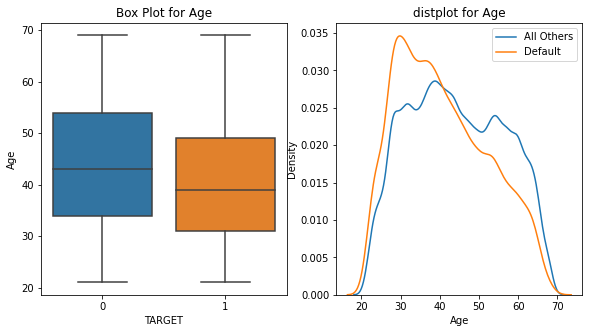

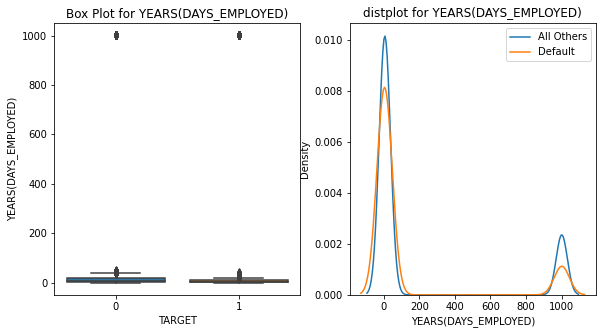

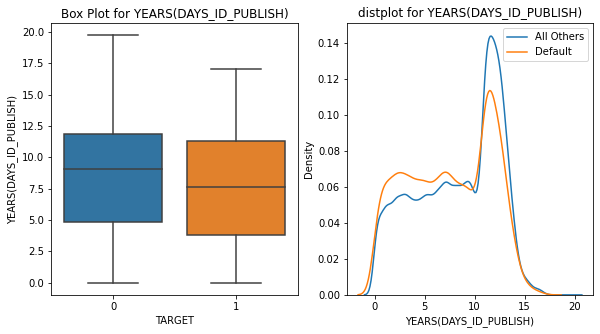

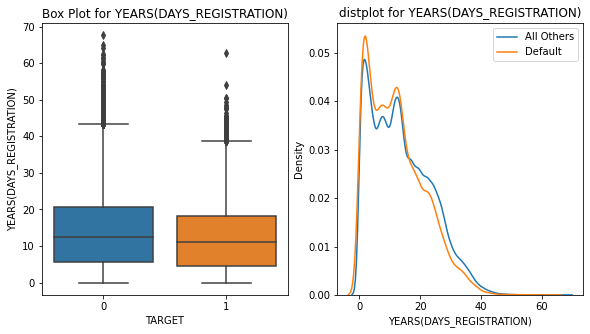

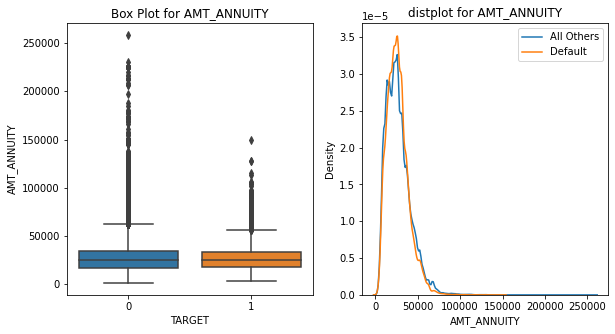

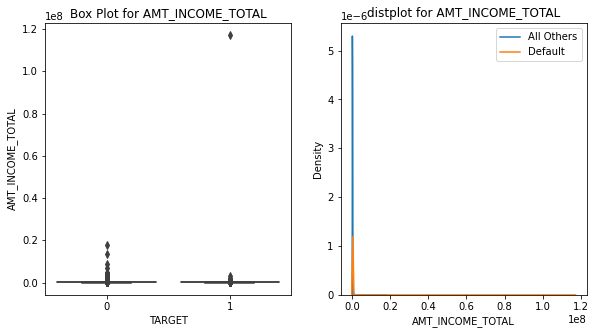

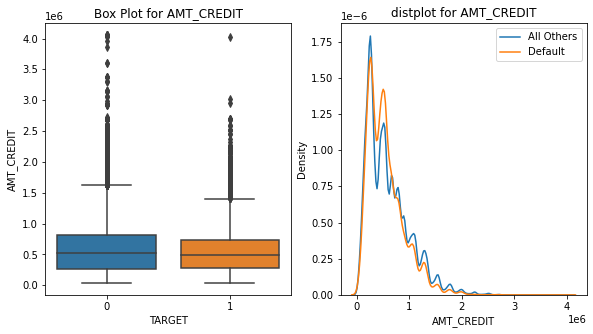

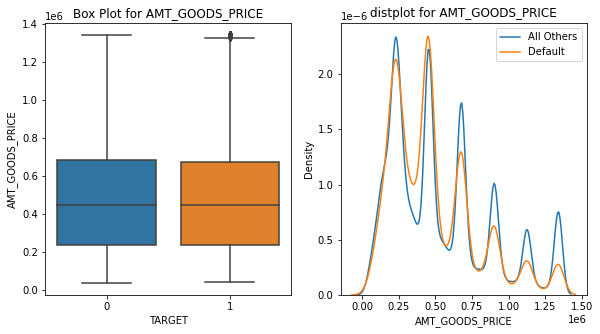

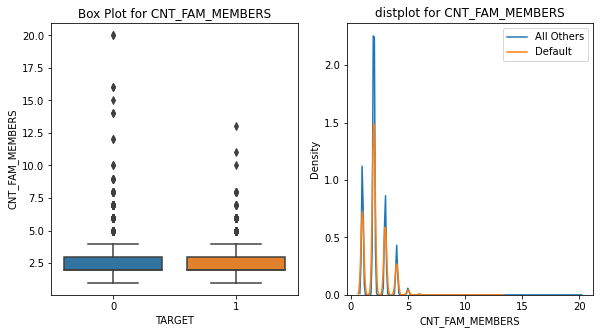

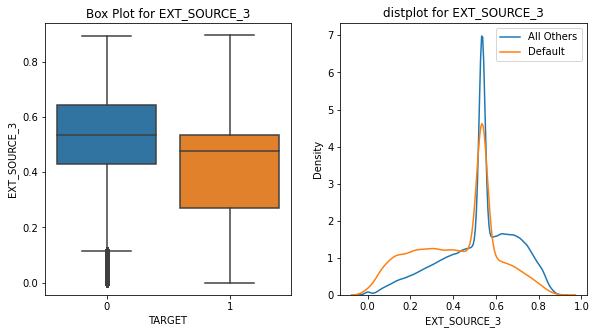

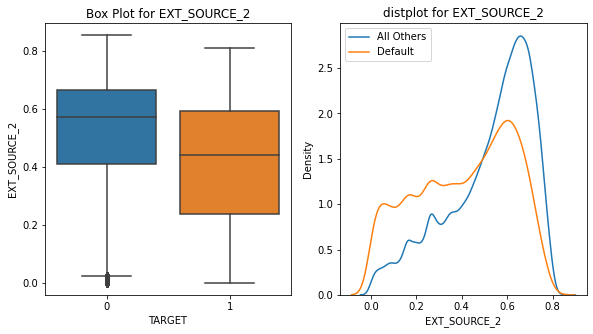

In [106]:
for x in num_cols:
    cont_plotter_with_target(x)

#### As we can see, these numerical columns are outlier infected, hence skewing our analysis results.

#### We are going to treat the outliers by flooring or capping and then plot the same graphs to see results

In [107]:
def treat_outlier(col):
    x=col
    q1=df[x].describe()["25%"]
    q3=df[x].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[x]=np.where(df[x]<lower_bound,lower_bound,df[x])
    df[x]=np.where(df[x]>upper_bound,upper_bound,df[x])


In [108]:
# treating outliers for all numerical columns
for x in num_cols:
    treat_outlier(x)

In [109]:
df0 = df[df.TARGET==0]
df1 = df[df.TARGET==1]

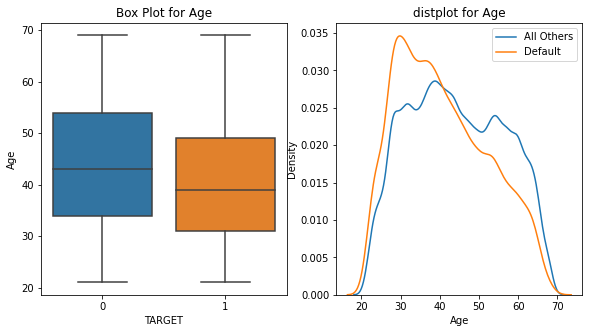

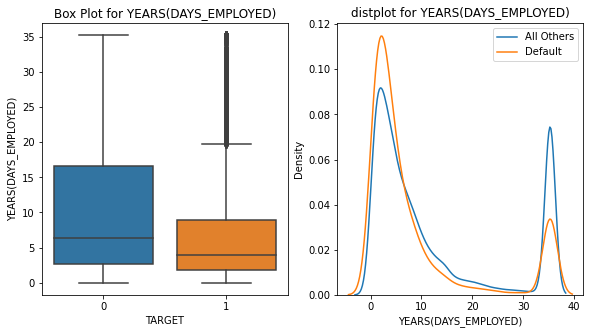

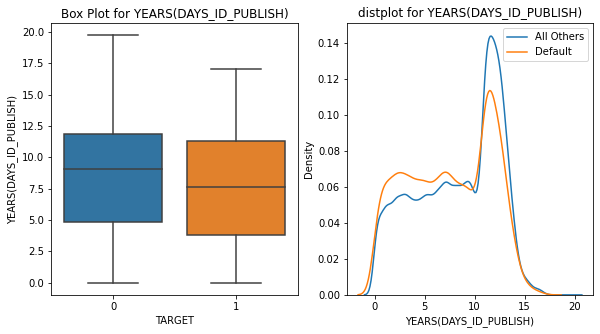

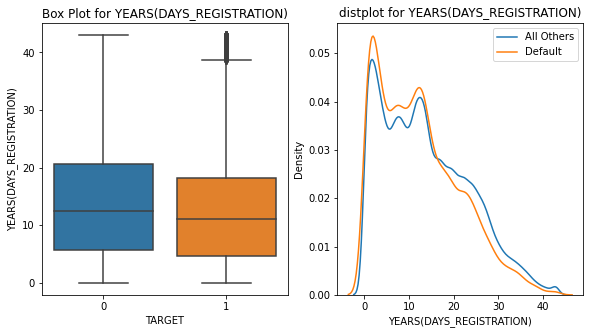

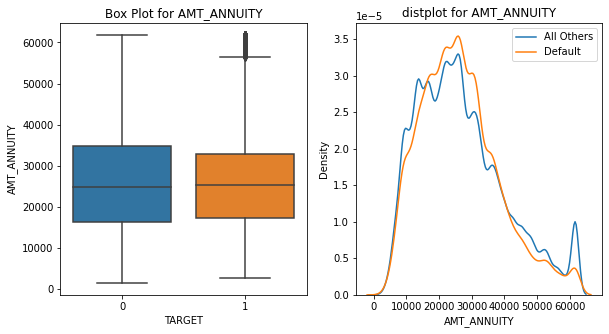

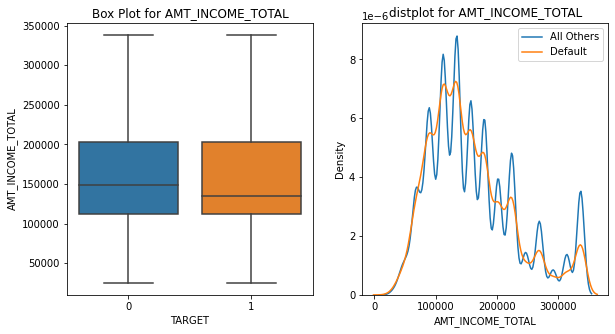

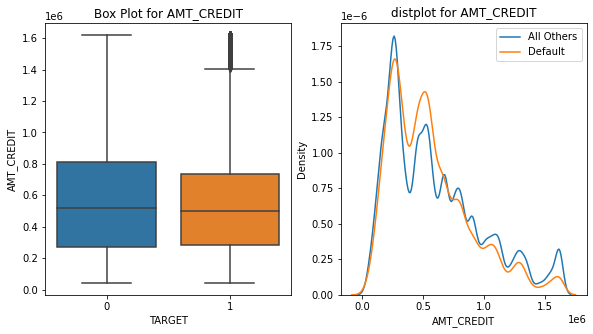

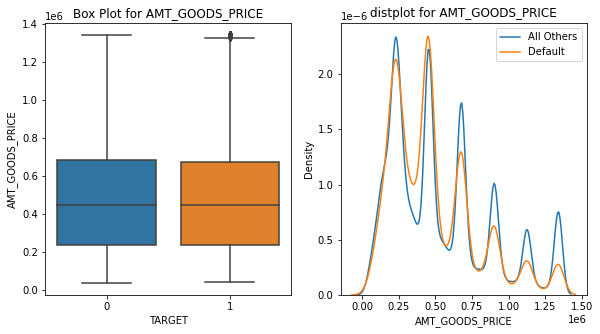

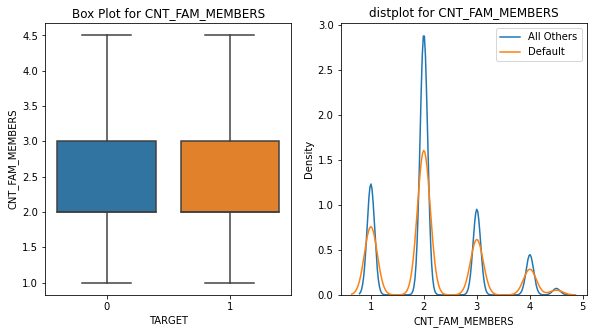

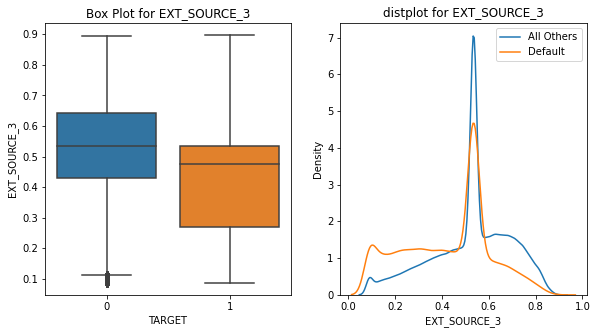

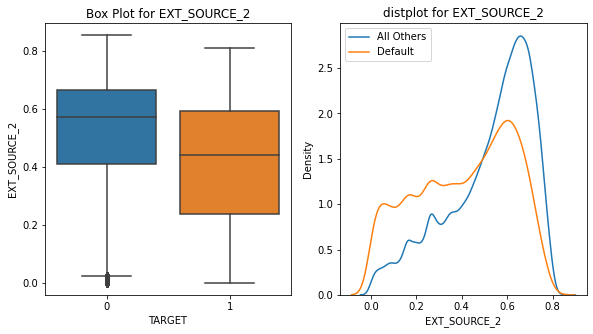

In [110]:
for x in num_cols:
    cont_plotter_with_target(x)

### Observations:
 * On an average, **defaulters** were **younger**
 * Median **income** of defaulters is **lower** than median income of all others
 * Applicants having **lower EXT_SOURCE_2 and EXT_SOURCE_3** values tend to **default more**
 

### Now, lets do bi-variate analysis 

In [111]:
def bi_cat_cont(x,y):
    plt.figure(figsize=(26,8))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=x,y=y, data=df,hue="TARGET")
    plt.title(f"{x} vs {y} with Target=1")
    plt.show()

##### Lets do bi-variate analysis with Age as one of the columns and check the patterns

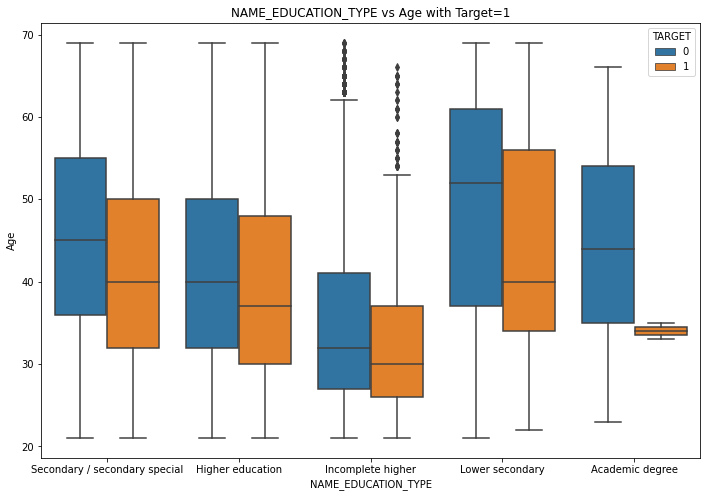

In [112]:
bi_cat_cont("NAME_EDUCATION_TYPE","Age")

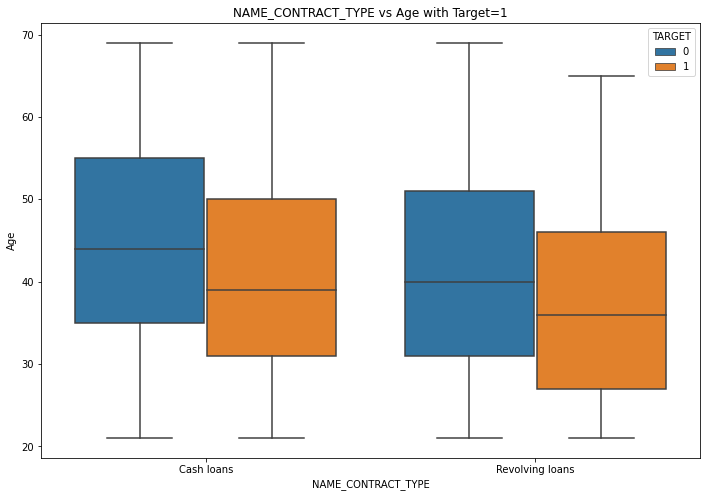

In [113]:
bi_cat_cont("NAME_CONTRACT_TYPE","Age")

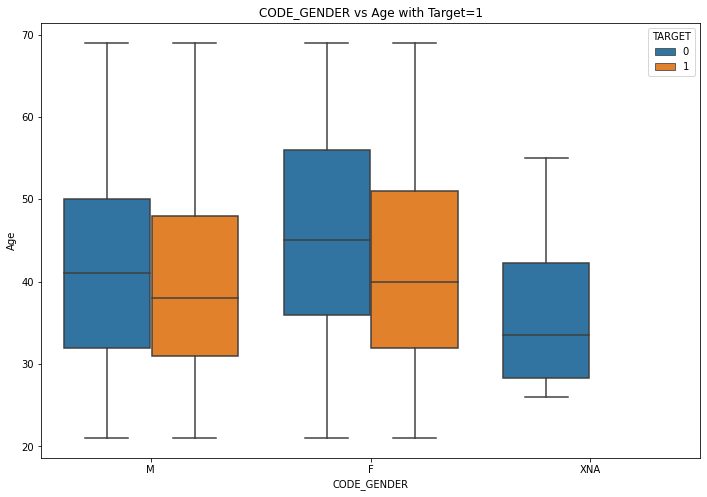

In [114]:
bi_cat_cont("CODE_GENDER","Age")

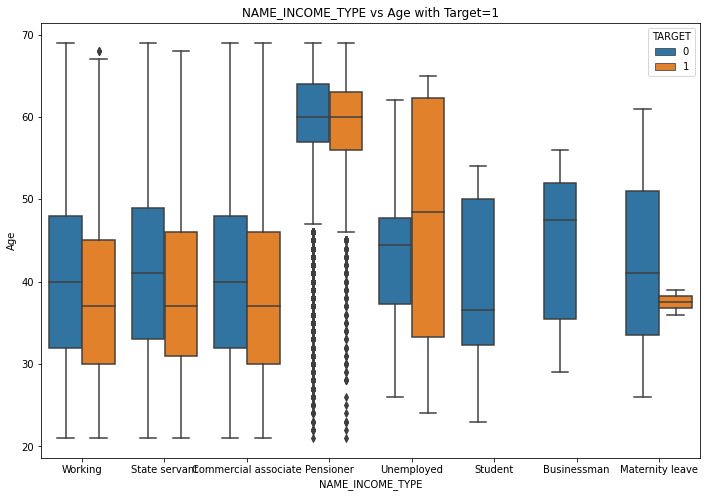

In [115]:

bi_cat_cont("NAME_INCOME_TYPE","Age")

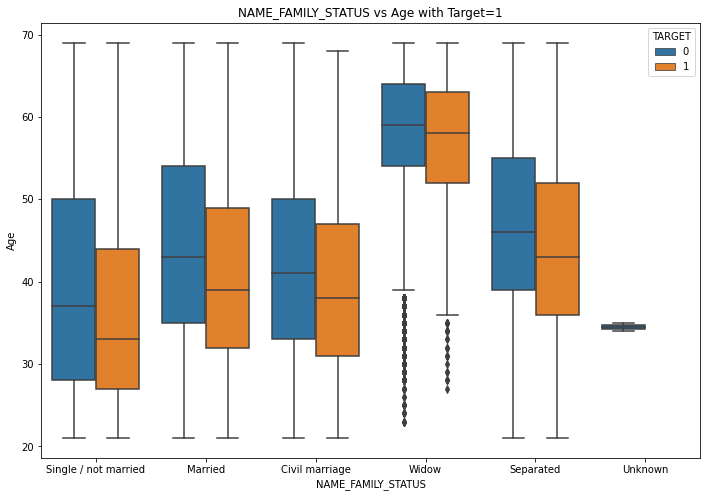

In [116]:
bi_cat_cont("NAME_FAMILY_STATUS","Age")

### Conclusion 
In **almost** every scenario, young people tend to default more 

#### lets do bi-variate analysis with AMT_INCOME_TOTAL as one of the columns

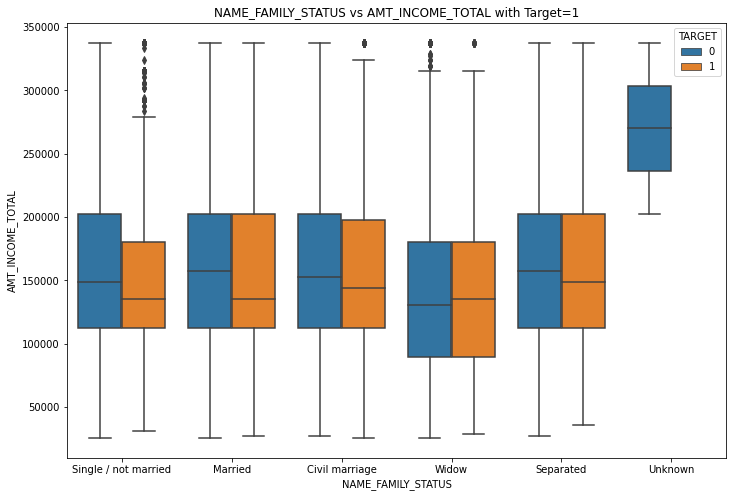

In [117]:
bi_cat_cont("NAME_FAMILY_STATUS","AMT_INCOME_TOTAL")

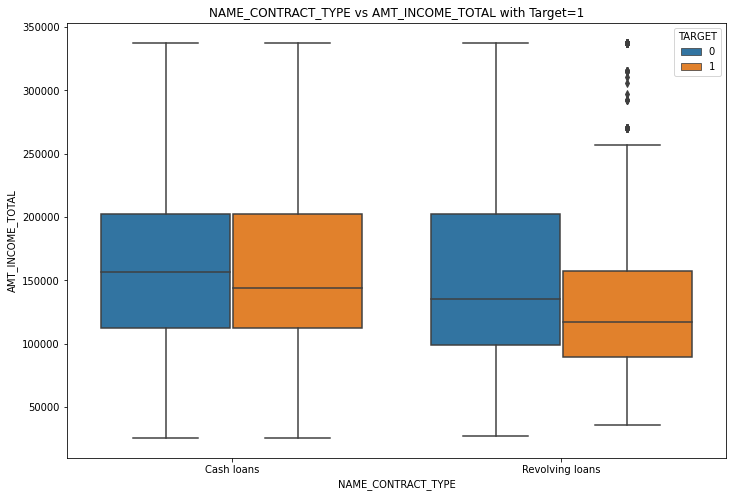

In [118]:
bi_cat_cont("NAME_CONTRACT_TYPE","AMT_INCOME_TOTAL")

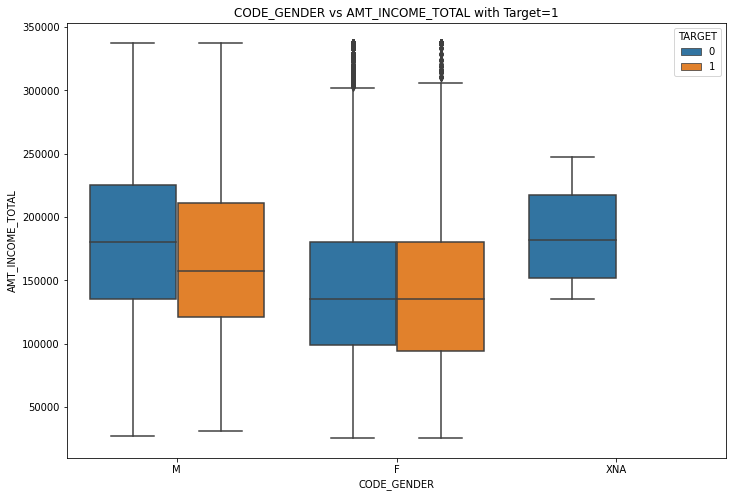

In [119]:
bi_cat_cont("CODE_GENDER","AMT_INCOME_TOTAL")

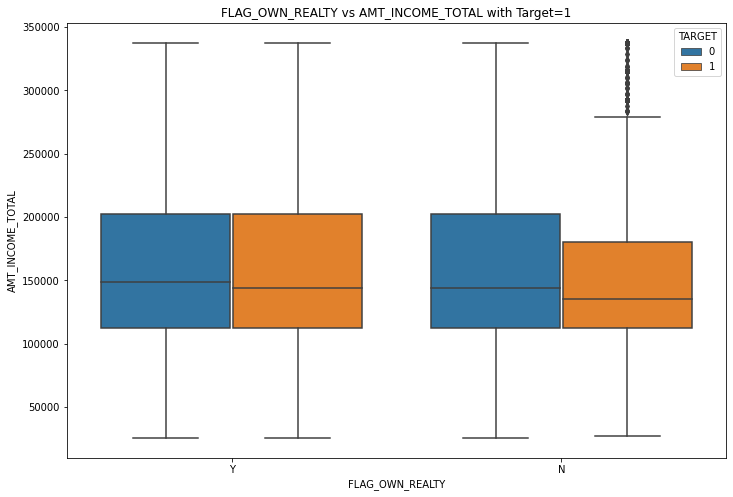

In [120]:
bi_cat_cont("FLAG_OWN_REALTY","AMT_INCOME_TOTAL")

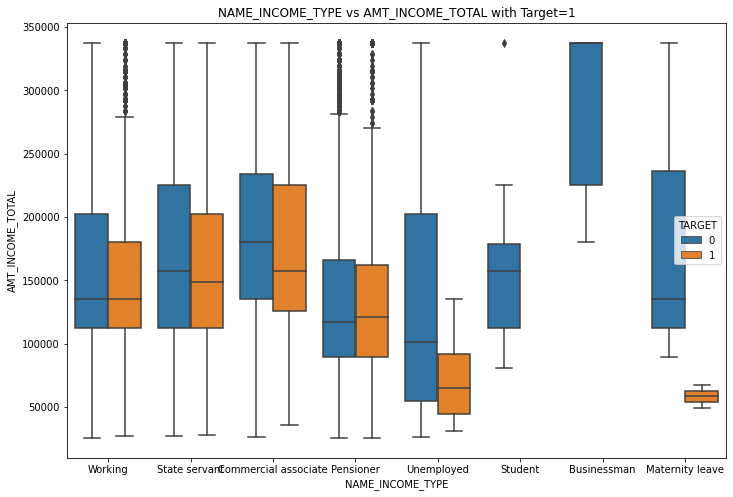

In [121]:
bi_cat_cont("NAME_INCOME_TYPE","AMT_INCOME_TOTAL")

### Concusion:
 * In almost every case(except pensioner and widow), people with low income total are facing payment difficulties 

### Lets do bi-variate analysis on two numerical variables

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

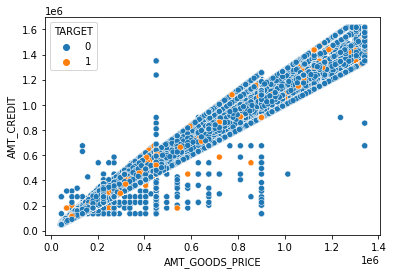

In [122]:
sns.scatterplot(x="AMT_GOODS_PRICE",y="AMT_CREDIT",hue="TARGET",data=df)

### Insight:
 * AMT_GOODS_PRICE and AMT_CREDIT appear to be highly correlated with each other

### Now, lets check correlation among variables

#### Correlation for Target=1

In [123]:
#selecting only required columns for better corr visual
imp_columns = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE',
                        'DAYS_REGISTRATION','DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 
                            'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','EXT_SOURCE_2', 'EXT_SOURCE_3',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [124]:
df_corr = df[imp_columns]

In [125]:
df_corr1 = df_corr[df_corr["TARGET"]==1]
df_corr0 = df_corr[df_corr["TARGET"]==0]

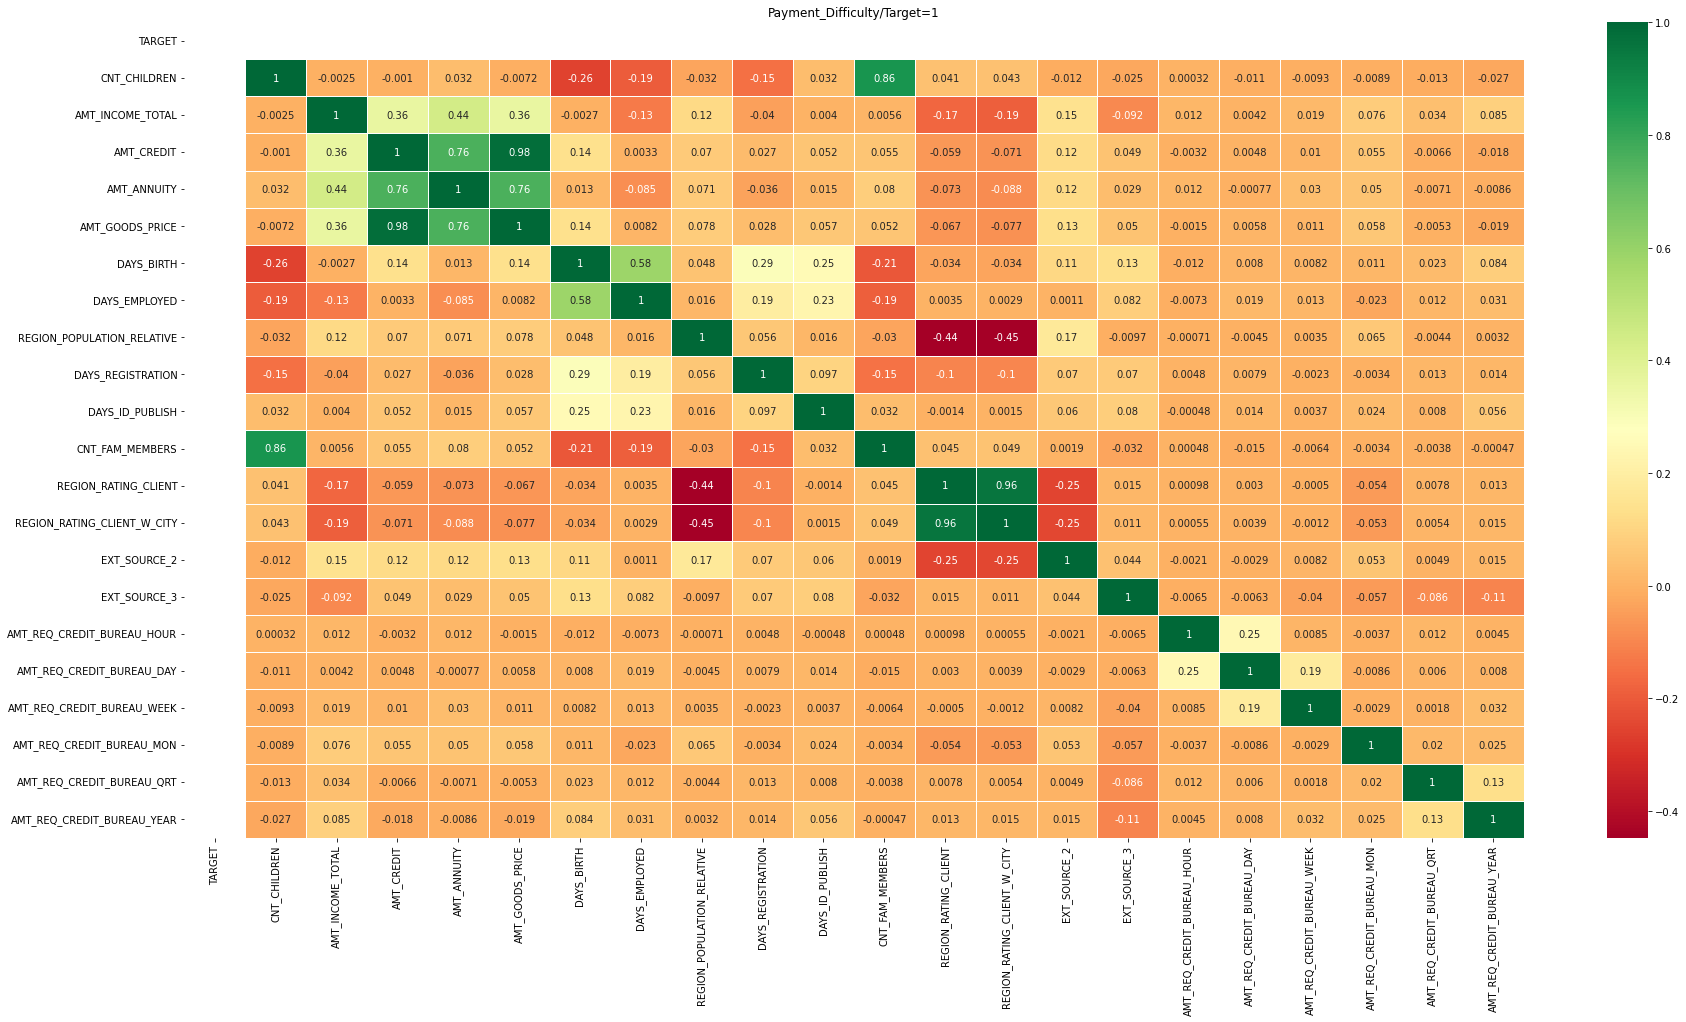

In [126]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_corr1.corr(),cmap="RdYlGn",annot=True,linewidth =1)
plt.title('Payment_Difficulty/Target=1')
plt.show()

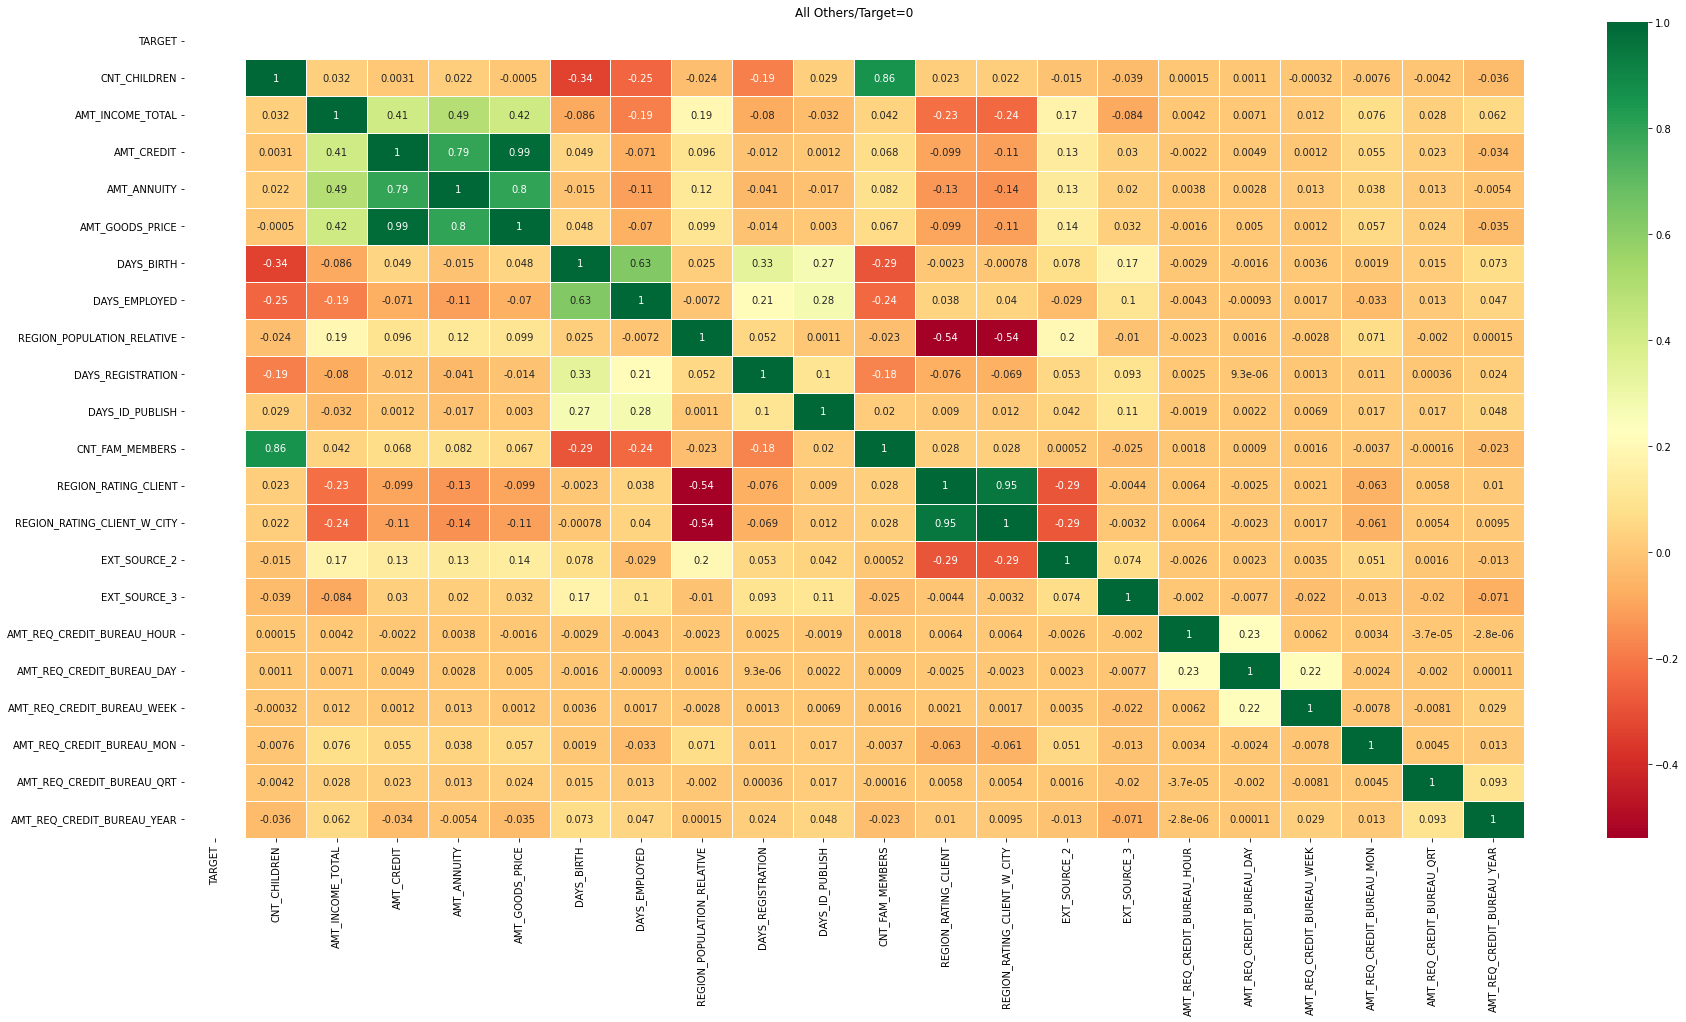

In [127]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_corr0.corr(),cmap="RdYlGn",annot=True,linewidth =1)
plt.title('All Others/Target=0')
plt.show()

### Top 10 correlated columns for TARGET=0

In [128]:
c0 = df_corr0.corr().abs()
s0 = c0.unstack()
so0=s0.sort_values(ascending=False,kind="quicksort")
so0[20:41:2]
#first is self correlation, ignoring that, next 10 are the top 10 correlations 

AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
AMT_CREDIT                   AMT_GOODS_PRICE               0.985582
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.950149
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.859466
AMT_GOODS_PRICE              AMT_ANNUITY                   0.797315
AMT_CREDIT                   AMT_ANNUITY                   0.794808
DAYS_EMPLOYED                DAYS_BIRTH                    0.626114
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    0.539005
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    0.537301
AMT_ANNUITY                  AMT_INCOME_TOTAL              0.492921
AMT_INCOME_TOTAL             AMT_GOODS_PRICE               0.417592
dtype: float64

### Top 10 correlated columns for TARGET=1

In [129]:
c1 = df_corr1.corr().abs()
s1 = c1.unstack()
so1=s1.sort_values(ascending=False,kind="quicksort")
so1[21:41:2]

AMT_CREDIT                   AMT_GOODS_PRICE                0.981837
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.861384
AMT_GOODS_PRICE              AMT_ANNUITY                    0.760287
AMT_ANNUITY                  AMT_CREDIT                     0.760123
DAYS_BIRTH                   DAYS_EMPLOYED                  0.582185
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY    0.446977
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE     0.443236
AMT_ANNUITY                  AMT_INCOME_TOTAL               0.436918
AMT_GOODS_PRICE              AMT_INCOME_TOTAL               0.357696
dtype: float64

## Now, Lets import second dataset

In [130]:
df2 = pd.read_csv("previous_application.csv")
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

#### Initial data inspection

In [131]:
df2.shape

(1670214, 37)

In [132]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [133]:
df2.describe(include="all")

SK_ID_PREV    SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  \
count   1.670214e+06  1.670214e+06            1670214  1.297979e+06   
unique           NaN           NaN                  4           NaN   
top              NaN           NaN         Cash loans           NaN   
freq             NaN           NaN             747553           NaN   
mean    1.923089e+06  2.783572e+05                NaN  1.595512e+04   
std     5.325980e+05  1.028148e+05                NaN  1.478214e+04   
min     1.000001e+06  1.000010e+05                NaN  0.000000e+00   
25%     1.461857e+06  1.893290e+05                NaN  6.321780e+03   
50%     1.923110e+06  2.787145e+05                NaN  1.125000e+04   
75%     2.384280e+06  3.675140e+05                NaN  2.065842e+04   
max     2.845382e+06  4.562550e+05                NaN  4.180581e+05   

        AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count      1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06   
unique              NaN           NaN               NaN              NaN   
top                 NaN           NaN               NaN              NaN   
freq                NaN           NaN               NaN              NaN   
mean       1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05   
std        2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05   
min        0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00   
25%        1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04   
50%        7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05   
75%        1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05   
max        6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
count                     1670214             1.670214e+06  ...   
unique                          7                      NaN  ...   
top                       TUESDAY                      NaN  ...   
freq                       255118                      NaN  ...   
mean                          NaN             1.248418e+01  ...   
std                           NaN             3.334028e+00  ...   
min                           NaN             0.000000e+00  ...   
25%                           NaN             1.000000e+01  ...   
50%                           NaN             1.200000e+01  ...   
75%                           NaN             1.500000e+01  ...   
max                           NaN             2.300000e+01  ...   

       NAME_SELLER_INDUSTRY   CNT_PAYMENT  NAME_YIELD_GROUP  \
count               1670214  1.297984e+06           1670214   
unique                   11           NaN                 5   
top                     XNA           NaN               XNA   
freq                 855720           NaN            517215   
mean                    NaN  1.605408e+01               NaN   
std                     NaN  1.456729e+01               NaN   
min                     NaN  0.000000e+00               NaN   
25%                     NaN  6.000000e+00               NaN   
50%                     NaN  1.200000e+01               NaN   
75%                     NaN  2.400000e+01               NaN   
max                     NaN  8.400000e+01               NaN   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
count               1669868       997149.000000  997149.000000   
unique                   17                 NaN            NaN   
top                    Cash                 NaN            NaN   
freq                 285990                 NaN            NaN   
mean                    NaN       342209.855039   13826.269337   
std                     NaN        88916.115833   72444.869708   
min                     NaN        -2922.000000   -2892.000000   
25%                     NaN       365243.000000   -1628.000000   
50%                     NaN       365243.000000    -831.000000   
75%                   

#### Checking null percentage column-wise

In [134]:
(100*df2.isnull().sum()/df2.shape[0]).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [135]:
df_missing_pc2 = (100*df2.isnull().sum()/df2.shape[0])
df_missing_pc2

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Selecting columns with >50% nulls to drop

In [136]:
df_toDrop2 = df_missing_pc2[df_missing_pc2>50]
len(df_toDrop2)

4

#### Dropping those columns as they have majiority values missing

In [137]:
df2 = df2.drop(columns=df_toDrop2.index)

In [138]:
df_missing_pc2 = (100*df2.isnull().sum()/df2.shape[0]).sort_values(ascending=False)
df_missing_pc2[df_missing_pc2>0]

NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

#### Lets impute in these columns one by one

<AxesSubplot:>

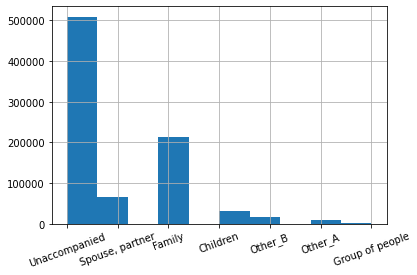

In [139]:
df2.NAME_TYPE_SUITE.hist(xrot=20)

In [140]:
df2.NAME_TYPE_SUITE.fillna("Unaccompanied", inplace=True)

<AxesSubplot:>

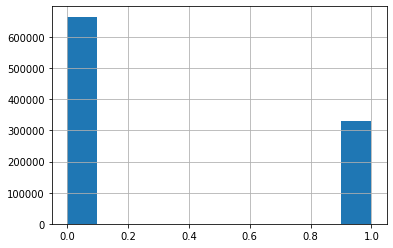

In [141]:
df2.NFLAG_INSURED_ON_APPROVAL.hist()

In [142]:
df2.NFLAG_INSURED_ON_APPROVAL.describe()

count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [143]:
#filling the median value
df2.NFLAG_INSURED_ON_APPROVAL.fillna(0,inplace=True)

#### imputing values for all Days columns with median

In [144]:
all_days_cols = ["DAYS_FIRST_DRAWING","DAYS_TERMINATION","DAYS_LAST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_FIRST_DUE"]
df2[all_days_cols] = df2[all_days_cols].fillna(df2[all_days_cols].median())

<AxesSubplot:>

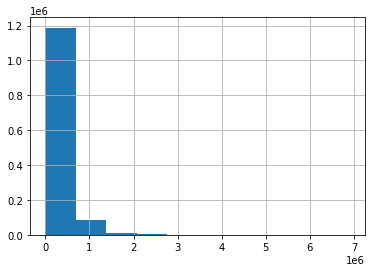

In [145]:
df2.AMT_GOODS_PRICE.hist()

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

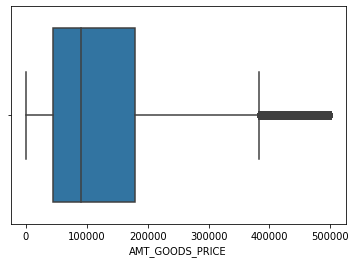

In [146]:
sns.boxplot(df2[df2.AMT_GOODS_PRICE<500000].AMT_GOODS_PRICE)

In [147]:
#Filling this with median

In [148]:
df2.AMT_GOODS_PRICE.fillna(df2.AMT_GOODS_PRICE.median,inplace=True)

In [149]:
df2.AMT_GOODS_PRICE.isnull().sum()

0

#### checking AMT_ANNUITY, CNT_PAYMENT columns

In [150]:
df2[["AMT_ANNUITY","CNT_PAYMENT"]].isnull().sum()

AMT_ANNUITY    372235
CNT_PAYMENT    372230
dtype: int64

In [151]:
df2[["AMT_ANNUITY","CNT_PAYMENT"]].describe()

AMT_ANNUITY   CNT_PAYMENT
count  1.297979e+06  1.297984e+06
mean   1.595512e+04  1.605408e+01
std    1.478214e+04  1.456729e+01
min    0.000000e+00  0.000000e+00
25%    6.321780e+03  6.000000e+00
50%    1.125000e+04  1.200000e+01
75%    2.065842e+04  2.400000e+01
max    4.180581e+05  8.400000e+01

In [152]:
#median appears suitable to fill missing values
df2[["AMT_ANNUITY","CNT_PAYMENT"]]=df2[["AMT_ANNUITY","CNT_PAYMENT"]].fillna(df2[["AMT_ANNUITY","CNT_PAYMENT"]].median())

#### checking PRODUCT_COMBINATION column


In [153]:
df2.PRODUCT_COMBINATION.isnull().sum()

346

In [154]:
df2.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

Filling nulls with Cash as it is the mode of this variable 

In [155]:
df2.PRODUCT_COMBINATION.fillna("Cash",inplace=True)

#### checking AMT_CREDIT column

In [156]:
df2.AMT_CREDIT.isnull().sum()

1

In [157]:
df2.AMT_CREDIT.fillna(df.AMT_CREDIT.median(),inplace=True)

#### Lets check missing again previous dataset

In [158]:
df_missing_pc2 = (100*df2.isnull().sum()/df2.shape[0]).sort_values(ascending=False)
df_missing_pc2[df_missing_pc2>0]

Series([], dtype: float64)

In [159]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  object 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

### So, All missing values are now imputated in previous application dataset

#### Now, lets work with the datatypes of columns 

In [160]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0         17145.0                   SATURDAY   
1    679671.0        607500.0                   THURSDAY   
2    136444.5        112500.0                    TUESDAY   
3    470790.0        450000.0                     MONDAY   
4    404055.0        337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  \
0                       15                           Y  ...   
1                       11                           Y  ...   
2                       11                           Y  ...   
3                        7                           Y  ...   
4                        9                           Y  ...   

   NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0          Connectivity        12.0           middle   
1                   XNA        36.0       low_action   
2                   XNA        12.0             high   
3                   XNA        12.0           middle   
4                   XNA        24.0             high   

        PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0  POS mobile with interest           365243.0          -42.0   
1          Cash X-Sell: low           365243.0         -134.0   
2         Cash X-Sell: high           365243.0         -271.0   
3       Cash X-Sell: middle           365243.0         -482.0   
4         Cash Street: high           365243.0         -831.0   

  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION  \
0                     300.0         -42.0            -37.0   
1                     916.0      365243.0         365243.0   
2                      59.0      365243.0         365243.0   
3                    -152.0        -182.0           -177.0   
4                    -361.0        -537.0           -499.0   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       0.0  

[5 rows x 33 columns]

In [161]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  object 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

#### Changing AMT_GOODS_PRICE column to numeric

In [162]:
df2.AMT_GOODS_PRICE = pd.to_numeric(df2.AMT_GOODS_PRICE,errors="coerce")

#### Treating outliers for some variables

In [163]:
outlier_cols=["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]

In [164]:
#x should contain column name
def rmv_outliers(df,x):
    q1=df[x].describe()["25%"]
    q3=df[x].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[x]=np.where(df[x]<lower_bound,lower_bound,df[x])
    df[x]=np.where(df[x]>upper_bound,upper_bound,df[x])


In [165]:
for x in outlier_cols:
    rmv_outliers(df2,x)

#### Binning the required variables

<AxesSubplot:ylabel='Frequency'>

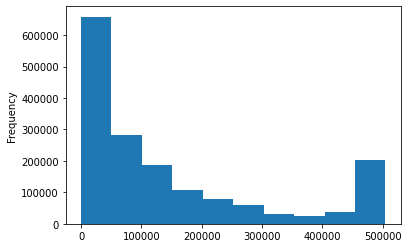

In [166]:
df2.AMT_CREDIT.plot.hist()

In [167]:
#Binning AMT_CREDIT variable

df2['AMT_CREDIT_buckets']=pd.cut(df2['AMT_CREDIT'],bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,5000000],
                                  labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','Above 10L'])


<AxesSubplot:>

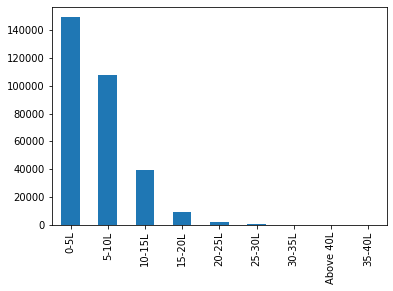

In [168]:
df.AMT_CREDIT_buckets.value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

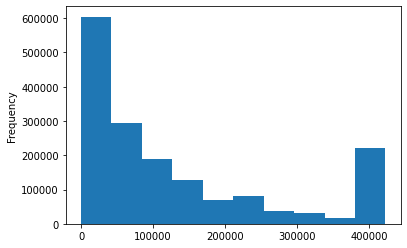

In [169]:
df2.AMT_APPLICATION.plot.hist()

In [170]:
#Binning AMT_APPLICATION variable
df2['AMT_APPLICATION_buckets'] = pd.cut(df2['AMT_APPLICATION'],bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,10000000],
                                         labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','Above 10L'])

<AxesSubplot:>

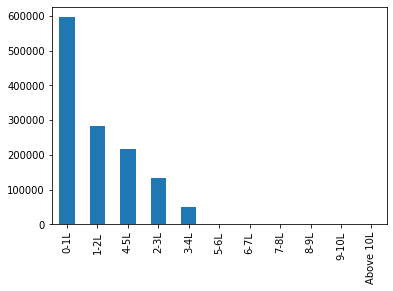

In [171]:
df2.AMT_APPLICATION_buckets.value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

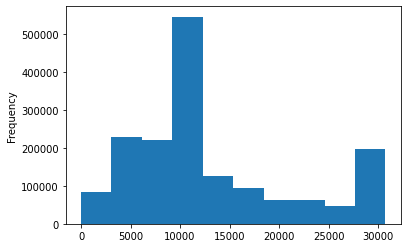

In [172]:
df2.AMT_ANNUITY.plot.hist()

#### Treatment of days columns - converting to years

In [173]:
df2[['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
    'DAYS_LAST_DUE','DAYS_TERMINATION']] = abs(df2[['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
                                                                                         'DAYS_TERMINATION']])

In [174]:
df2[['DAYS_DECISION_YEARS','DAYS_FIRST_DRAWING_YEARS','DAYS_FIRST_DUE_YEARS','DAYS_LAST_DUE_1ST_VERSION_YEARS',
                         'DAYS_LAST_DUE_YEARS','DAYS_TERMINATION_YEARS']] = round(df2[['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']]/365,0)

In [175]:
df2[['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
    'DAYS_LAST_DUE','DAYS_TERMINATION']]

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0                   73            365243.0            42.0   
1                  164            365243.0           134.0   
2                  301            365243.0           271.0   
3                  512            365243.0           482.0   
4                  781            365243.0           831.0   
...                ...                 ...             ...   
1670209            544            365243.0           508.0   
1670210           1694            365243.0          1604.0   
1670211           1488            365243.0          1457.0   
1670212           1185            365243.0          1155.0   
1670213           1193            365243.0          1163.0   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
0                            300.0           42.0              37.0  
1                            916.0       365243.0          365243.0  
2                             59.0       365243.0          365243.0  
3                            152.0          182.0             177.0  
4                            361.0          537.0             499.0  
...                            ...            ...               ...  
1670209                      362.0          358.0             351.0  
1670210                     1274.0         1304.0            1297.0  
1670211                     1187.0         1187.0            1181.0  
1670212                      825.0          825.0             817.0  
1670213                      247.0          443.0             423.0  

[1670214 rows x 6 columns]

In [176]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 41 columns):
 #   Column                           Non-Null Count    Dtype   
---  ------                           --------------    -----   
 0   SK_ID_PREV                       1670214 non-null  int64   
 1   SK_ID_CURR                       1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE               1670214 non-null  object  
 3   AMT_ANNUITY                      1670214 non-null  float64 
 4   AMT_APPLICATION                  1670214 non-null  float64 
 5   AMT_CREDIT                       1670214 non-null  float64 
 6   AMT_GOODS_PRICE                  1284699 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START       1670214 non-null  object  
 8   HOUR_APPR_PROCESS_START          1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT      1670214 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY           1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE           1670

### lets check some insights from previous_application sataset

<AxesSubplot:>

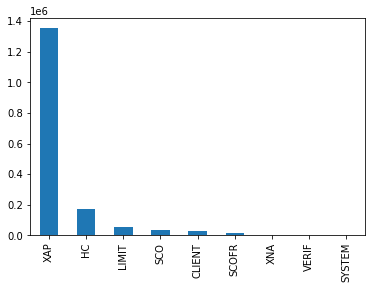

In [177]:
df2.CODE_REJECT_REASON.value_counts().plot.bar()

* As we see, most of the applications are accepted(XAP=not applicable)
 * reject reason not applicable means accepted 
* Also, main reasons for rejection are HC, LIMIT and SCO

<AxesSubplot:>

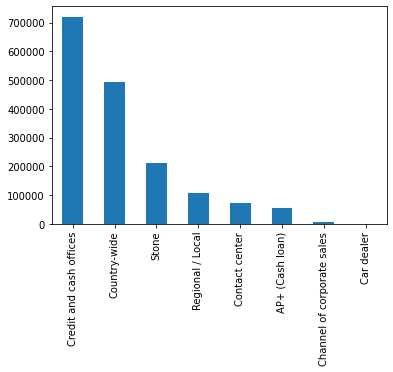

In [178]:
df2.CHANNEL_TYPE.value_counts().plot.bar()

Credit and Cash offices are most frequently used channel

<AxesSubplot:ylabel='NAME_CLIENT_TYPE'>

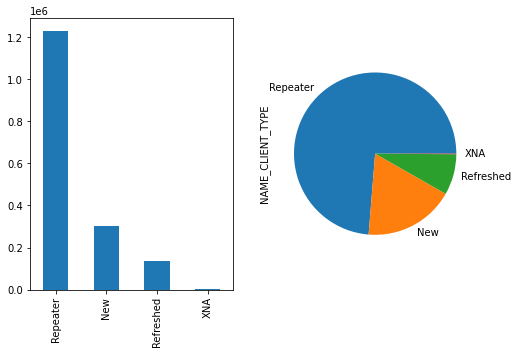

In [179]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df2.NAME_CLIENT_TYPE.value_counts().plot.bar()
plt.subplot(1,2,2)
df2.NAME_CLIENT_TYPE.value_counts().plot.pie()

Maximum clients are **repeaters**, followed by **new**

<AxesSubplot:ylabel='NAME_CONTRACT_TYPE'>

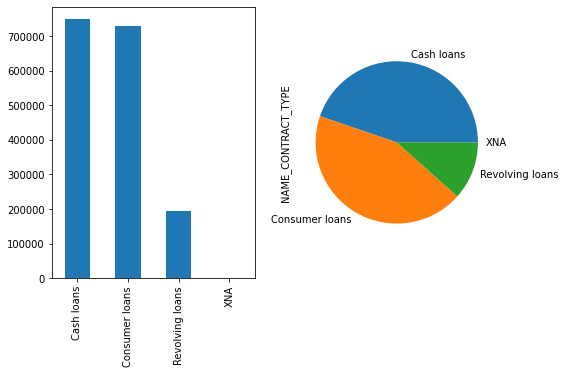

In [180]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df2.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.subplot(1,2,2)
df2.NAME_CONTRACT_TYPE.value_counts().plot.pie()

Cash loans and consumer loans are most used contract types

<AxesSubplot:ylabel='NAME_CONTRACT_STATUS'>

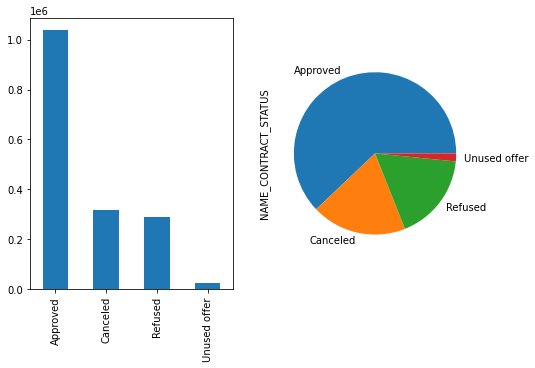

In [181]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df2.NAME_CONTRACT_STATUS.value_counts().plot.bar()
plt.subplot(1,2,2)
df2.NAME_CONTRACT_STATUS.value_counts().plot.pie()

Most applications get approved, some get refused or canceled and a few are unused

## Now, combining both the datasets to check effects on TARGET variable and for further analysis

In [182]:
df_merge = pd.merge(df,df2,how="inner",on=["SK_ID_CURR"])
df_merge.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  \
0        24700.5  ...              17.0                       0.0   
1        35698.5  ...             527.0                       1.0   
2        35698.5  ...             639.0                       0.0   
3        35698.5  ...            1976.0                       1.0   
4         6750.0  ...             714.0                       0.0   

  AMT_CREDIT_buckets_y AMT_APPLICATION_buckets DAYS_DECISION_YEARS  \
0                 1-2L                    1-2L                 2.0   
1                 5-6L                    4-5L                 2.0   
2                 3-4L                    3-4L                 2.0   
3                 0-1L                    0-1L                 6.0   
4                 0-1L                    0-1L                 2.0   

  DAYS_FIRST_DRAWING_YEARS  DAYS_FIRST_DUE_YEARS  \
0                   1001.0                   2.0   
1                   1001.0                   2.0   
2                   1001.0                   2.0   
3                   1001.0                   6.0   
4                   1001.0                   2.0   

   DAYS_LAST_DUE_1ST_VERSION_YEARS  DAYS_LAST_DUE_YEARS  \
0                              0.0                  0.0   
1                              1.0                  1.0   
2                              2.0                  2.0   
3                              5.0                  5.0   
4                              2.0                  2.0   

   DAYS_TERMINATION_YEARS  
0                     0.0  
1                     1.0  
2                     2.0  
3                     5.0  
4                     2.0  

[5 rows x 123 columns]

### Inspecting the merged dataset

In [183]:
df_merge.describe(include="all")

SK_ID_CURR        TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  \
count   1.413701e+06  1.413701e+06              1413701     1413701   
unique           NaN           NaN                    2           3   
top              NaN           NaN           Cash loans           F   
freq             NaN           NaN              1307115      955139   
mean    2.784813e+05  8.655296e-02                  NaN         NaN   
std     1.028118e+05  2.811789e-01                  NaN         NaN   
min     1.000020e+05  0.000000e+00                  NaN         NaN   
25%     1.893640e+05  0.000000e+00                  NaN         NaN   
50%     2.789920e+05  0.000000e+00                  NaN         NaN   
75%     3.675560e+05  0.000000e+00                  NaN         NaN   
max     4.562550e+05  1.000000e+00                  NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count       1413701         1413701  1.413701e+06      1.413701e+06   
unique            2               2           NaN               NaN   
top               N               Y           NaN               NaN   
freq         937176         1024092           NaN               NaN   
mean            NaN             NaN  4.048933e-01      1.680188e+05   
std             NaN             NaN  7.173454e-01      7.278981e+04   
min             NaN             NaN  0.000000e+00      2.565000e+04   
25%             NaN             NaN  0.000000e+00      1.125000e+05   
50%             NaN             NaN  0.000000e+00      1.575000e+05   
75%             NaN             NaN  1.000000e+00      2.070000e+05   
max             NaN             NaN  1.900000e+01      3.375000e+05   

        AMT_CREDIT_x  AMT_ANNUITY_x  ...  DAYS_TERMINATION  \
count   1.413701e+06   1.413701e+06  ...      1.413701e+06   
unique           NaN            NaN  ...               NaN   
top              NaN            NaN  ...               NaN   
freq             NaN            NaN  ...               NaN   
mean    5.832179e+05   2.676404e+04  ...      5.077479e+04   
std     3.706251e+05   1.300470e+04  ...      1.254167e+05   
min     4.500000e+04   1.615500e+03  ...      2.000000e+00   
25%     2.700000e+05   1.682100e+04  ...      4.990000e+02   
50%     5.084955e+05   2.492550e+04  ...      4.990000e+02   
75%     8.079840e+05   3.454200e+04  ...      1.570000e+03   
max     1.616625e+06   6.170400e+04  ...      3.652430e+05   

       NFLAG_INSURED_ON_APPROVAL AMT_CREDIT_buckets_y AMT_APPLICATION_buckets  \
count               1.413701e+06              1137124                 1088399   
unique                       NaN                    6                       5   
top                          NaN                 0-1L                    0-1L   
freq                         NaN               516696                  512400   
mean                1.993661e-01                  NaN                     NaN   
std                 3.995239e-01                  NaN                     NaN   
min                 0.000000e+00                  NaN                     NaN   
25%                 0.000000e+00                  NaN                     NaN   
50%                 0.000000e+00                  NaN                     NaN   
75%                 0.000000e+00                  NaN                     NaN   
max                 1.000000e+00                  NaN                     NaN   

       DAYS_DECISION_YEARS DAYS_FIRST_DRAWING_YEARS  DAYS_FIRST_DUE_YEARS  \
count         1.413701e+06             1.413701e+06          1.413701e+06   
unique                 NaN                      NaN                   NaN   
top                    NaN                      NaN                   NaN   
freq                   NaN                      NaN                   NaN   
mean          2.415718e+00             9.632282e+02          2.659471e+01   
std           2.168983e+00             1.904540e+02          1.528855e+02   
min           0.000000e+00             0.000000

In [184]:
df_merge.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE_x               0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
                                  ..
DAYS_FIRST_DRAWING_YEARS           0
DAYS_FIRST_DUE_YEARS               0
DAYS_LAST_DUE_1ST_VERSION_YEARS    0
DAYS_LAST_DUE_YEARS                0
DAYS_TERMINATION_YEARS             0
Length: 123, dtype: int64

##### Checking null values percent in a column

In [185]:
(100*df_merge.isnull().sum()/df_merge.shape[0]).sort_values(ascending=False)

AMT_APPLICATION_buckets        23.010665
AMT_GOODS_PRICE_y              22.602021
AMT_CREDIT_buckets_y           19.564038
Price_bucket                    4.975309
EXT_SOURCE_2                    0.128811
                                 ...    
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
DAYS_TERMINATION_YEARS          0.000000
Length: 123, dtype: float64

##### We have less than 25% null values

### Lets check imbalance in target variable

<AxesSubplot:ylabel='TARGET'>

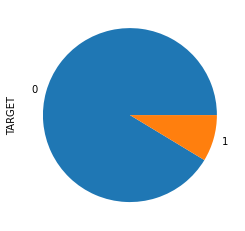

In [186]:
df_merge.TARGET.value_counts().plot.pie()

As, the target variable looks imbalanced, we will make two sub-datasets for analysis

##### FIrst, we will have to separate out Target=1 and Target=0 from merged dataset

In [187]:
df_merge0 = df_merge[df_merge["TARGET"]==0]
df_merge1 = df_merge[df_merge["TARGET"]==1]

In [188]:
def cont_plotter_with_target_merged(col):

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df_merge, y=col,x="TARGET", orient='v').set(title=f'Box Plot for {col}')
    plt.subplot(1, 3, 2)
    
    
    sns.distplot(df_merge0[col],hist=False,label=f'All Others')
    sns.distplot(df_merge1[col],hist=False,label=f'Default')
    plt.legend()
    plt.title(f'distplot for {col}')
    plt.show()   

#### making a list of numerical columns from merged dataset to be analysed

In [189]:
merged_num_cols = ["EXT_SOURCE_2","AMT_INCOME_TOTAL","EXT_SOURCE_3","AMT_CREDIT_x","Age"]

#### Analysis on numerical variables

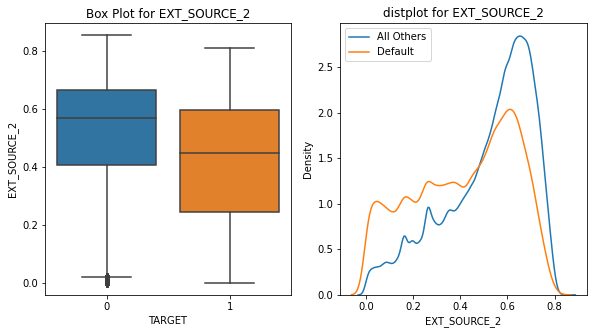

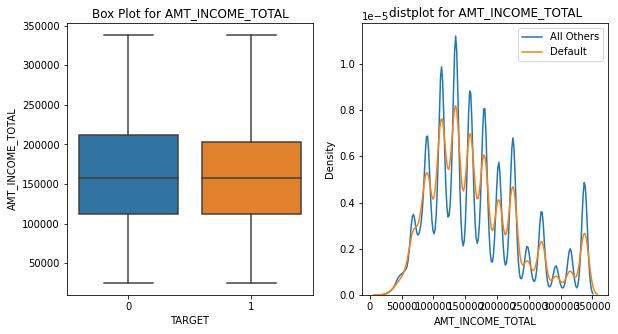

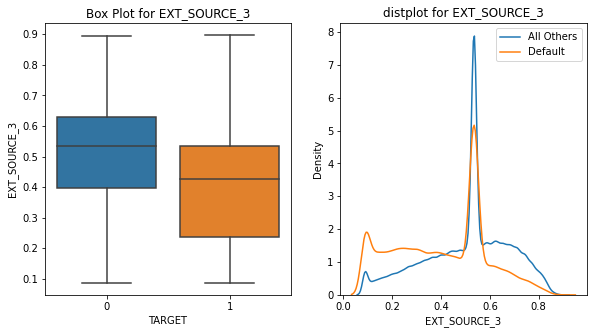

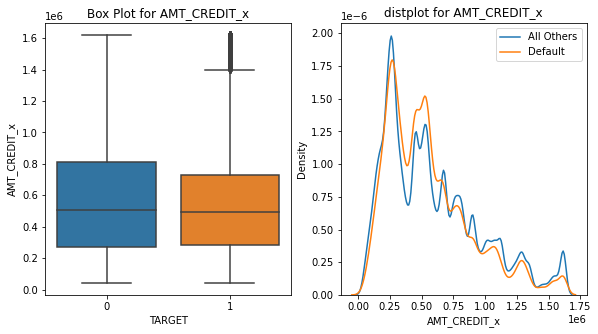

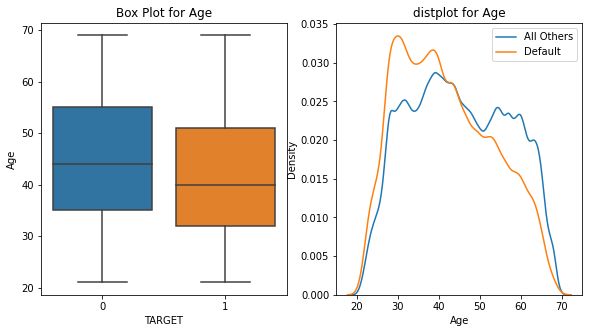

In [190]:
for x in merged_num_cols:
    cont_plotter_with_target_merged(x)

### Insights :
 * Lower EXT_SOURCE_2 and EXT_SOURCE_3 values enhance the chances of Default
 * Lower AMT_INCOME_TOTAL have slightly more chances of default
 * If ANOUNT_CREDIT is low(2.5L to 5L), there are more chances of default
 * Young applicants tend to default more

### Analysing NAME_CONTRACT_STATUS with different variables

In [191]:
vars = ["TARGET","FLAG_OWN_CAR","NAME_EDUCATION_TYPE","NAME_HOUSING_TYPE","Age_Group","NAME_INCOME_TYPE","AMT_INCOME_TOTAL_buckets","CODE_REJECT_REASON"]

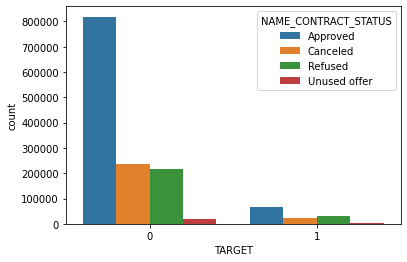

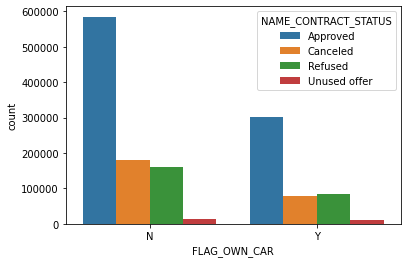

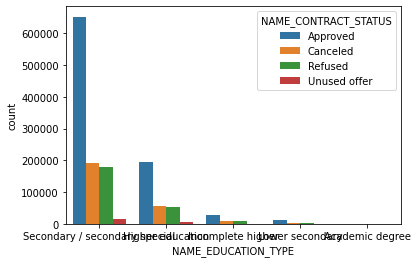

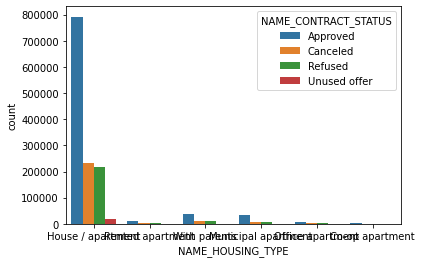

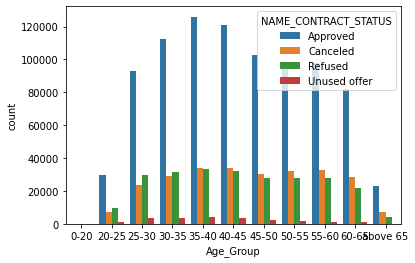

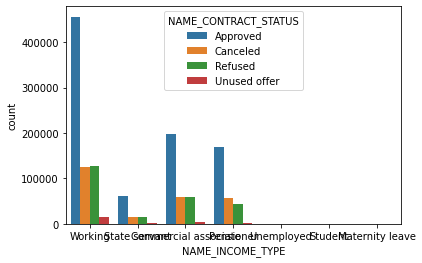

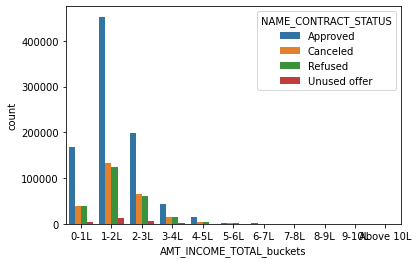

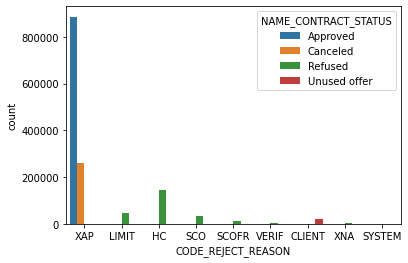

In [192]:
for x in vars:
    sns.countplot(data=df_merge,x=x,hue="NAME_CONTRACT_STATUS")
    plt.show()

#### Insight:
  *  More than 90% applications get approved, and only around 5% of the approved are defaulters
  * HC and LIMIT are most frequent rejection reasons

#### Analysis on Categorical variables

In [193]:
def target_with_cat_merged(col):
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(30,12))
    
    sns.countplot(x=col, data=df_merge1,ax=ax1,linewidth=1)
    ax1.set_ylabel('Count',fontsize=20)
    ax1.set_title(f'Distribution of {col} for Target = 1 ',fontsize=20)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=35, ha="right",fontsize=20)
    
    #normalized percentage on top of bars
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_merge1))*100),
                     (p.get_x()+0.4, p.get_height()+100),
                     ha='center',fontsize=20)
        
    sns.countplot(x=col, data=df_merge0,ax=ax2,linewidth=1)
    ax2.set_ylabel('Count',fontsize=20)
    ax2.set_title(f'Distribution of {col} for Target = 0',fontsize = 20)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=35, ha="right",fontsize=20)
    
    #normalized percentage on top of bars
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_merge0))*100), 
                     (p.get_x()+0.4, p.get_height()+100), 
                     ha='center',fontsize=20)
    
    plt.show()

In [194]:
merged_cat_cols = ["CODE_GENDER","NAME_EDUCATION_TYPE","OCCUPATION_TYPE","Age_Group","NAME_HOUSING_TYPE"]

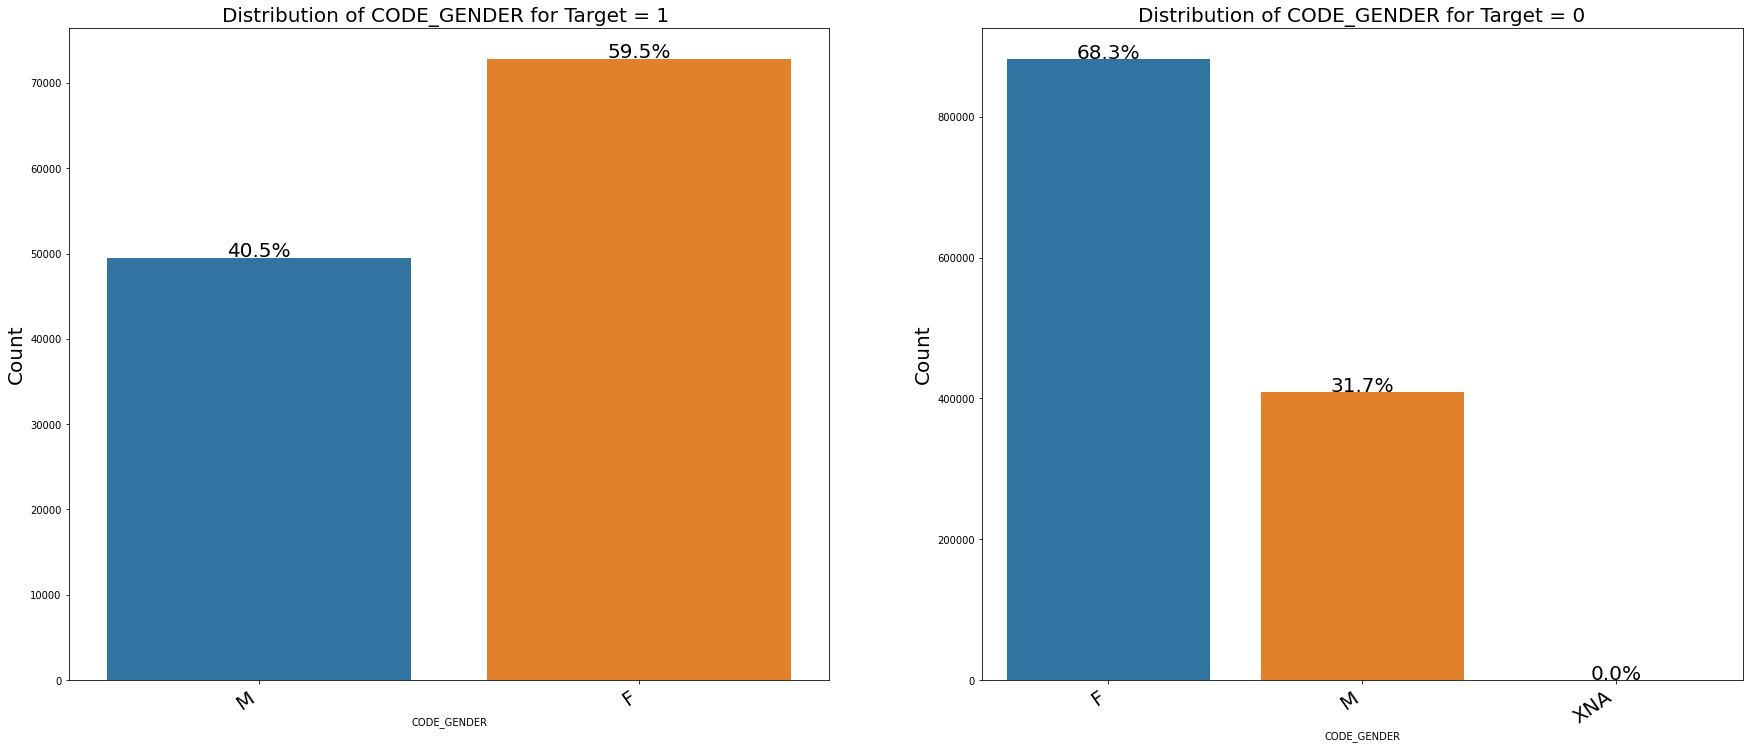

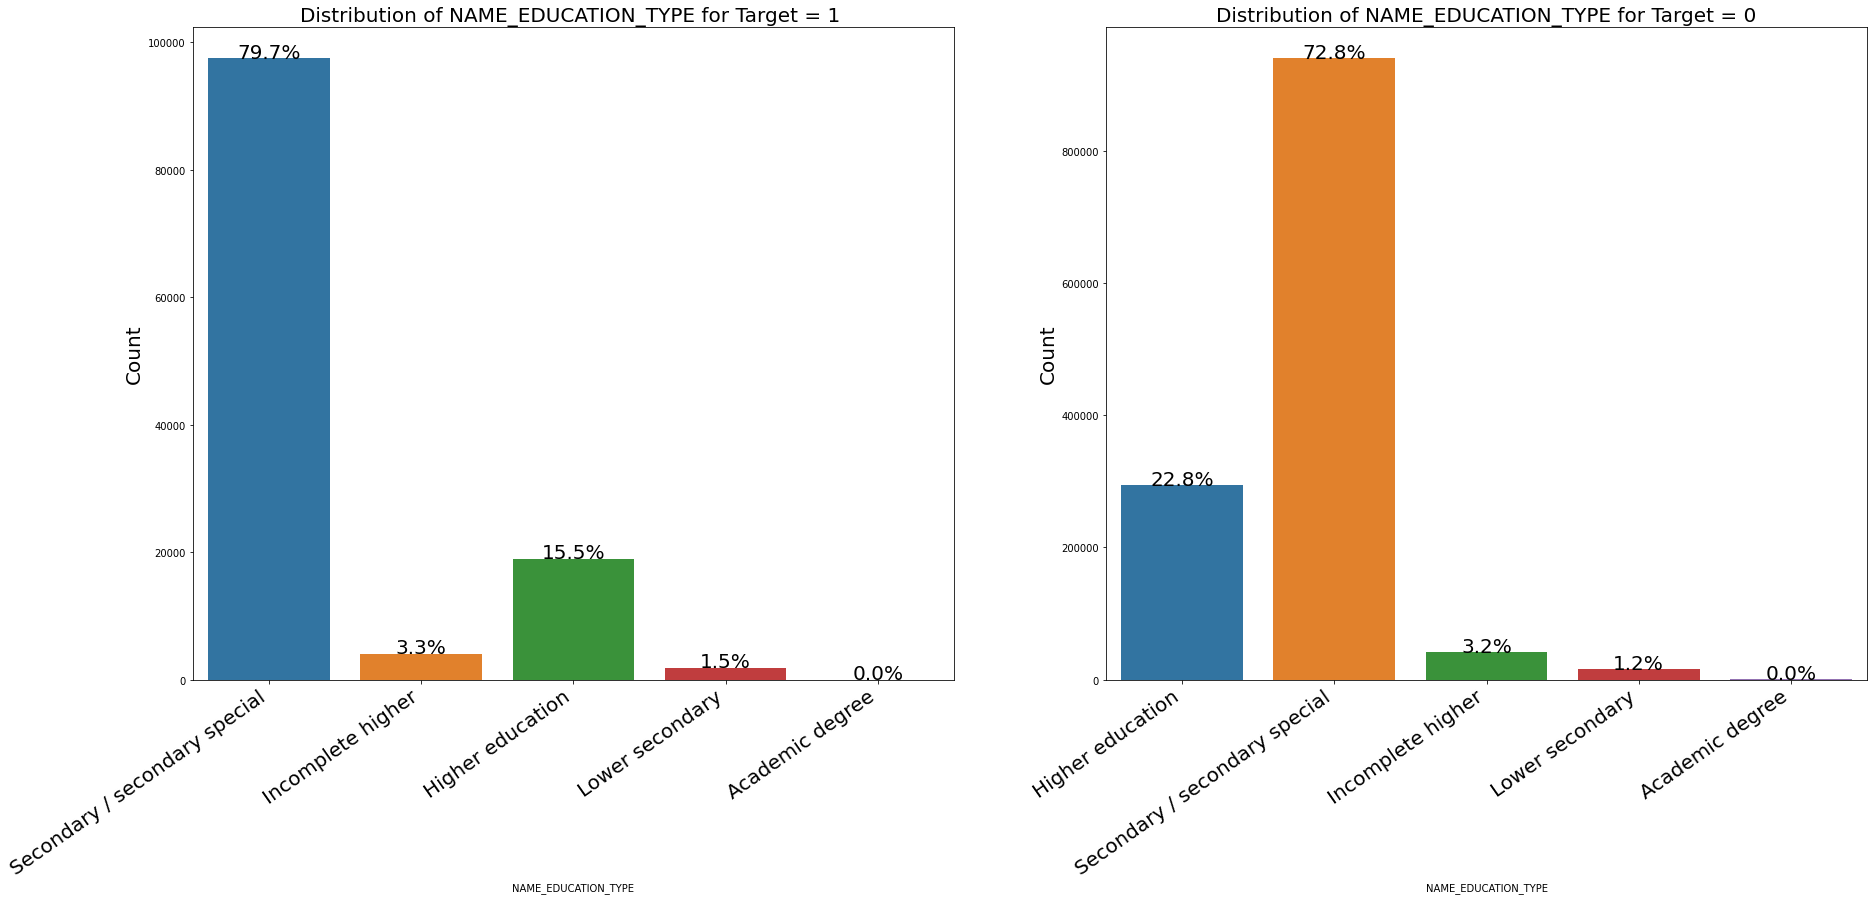

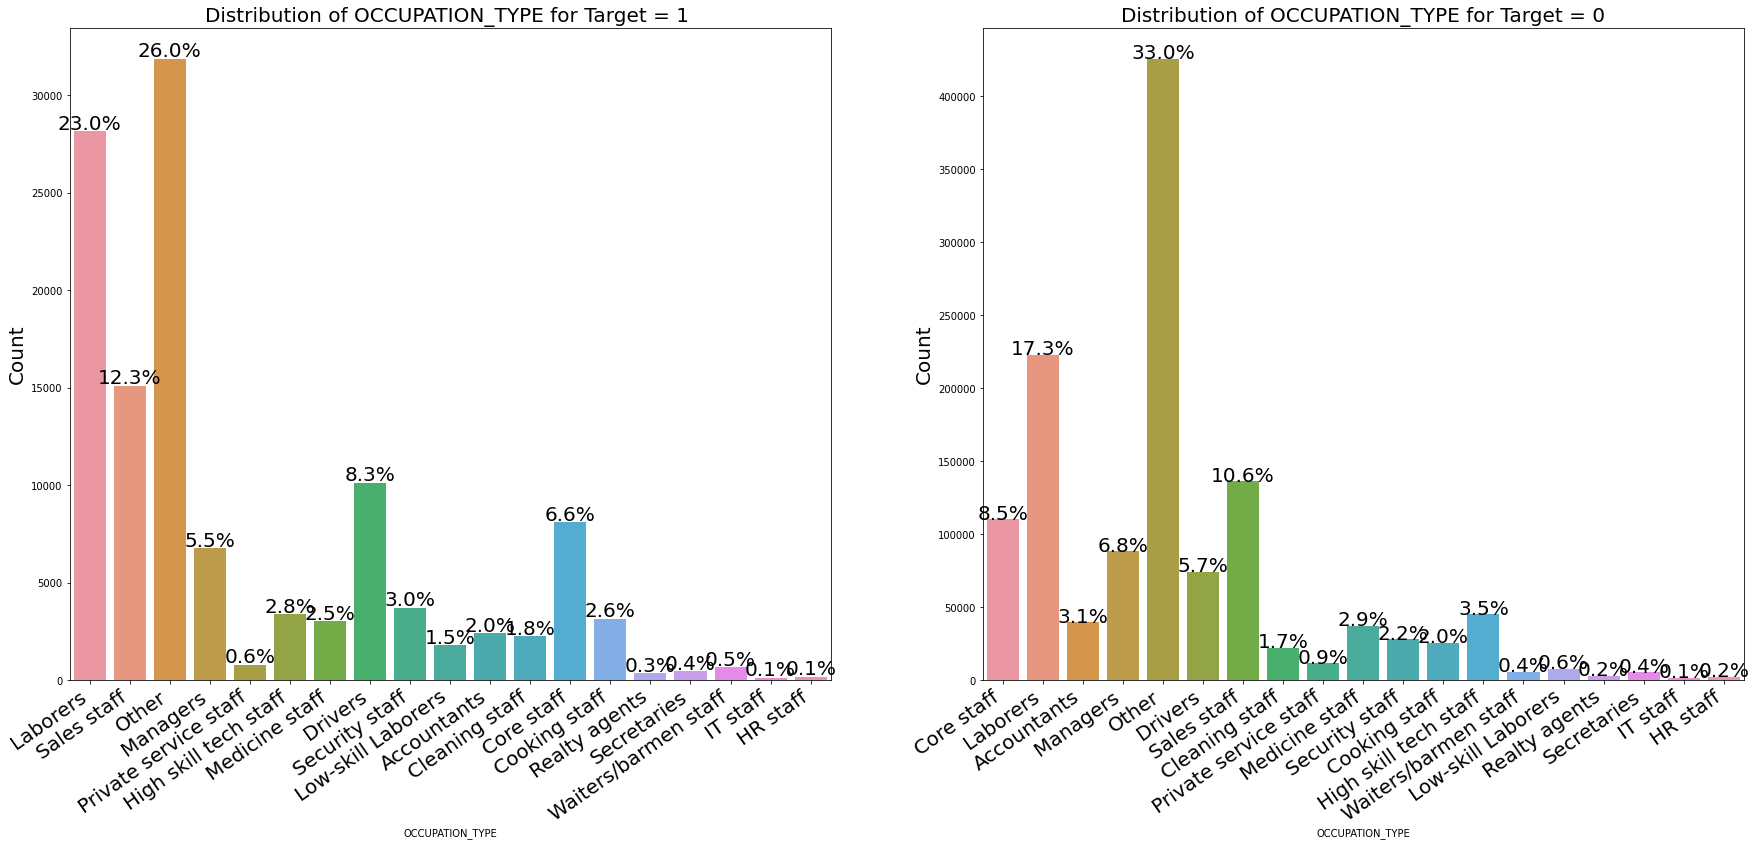

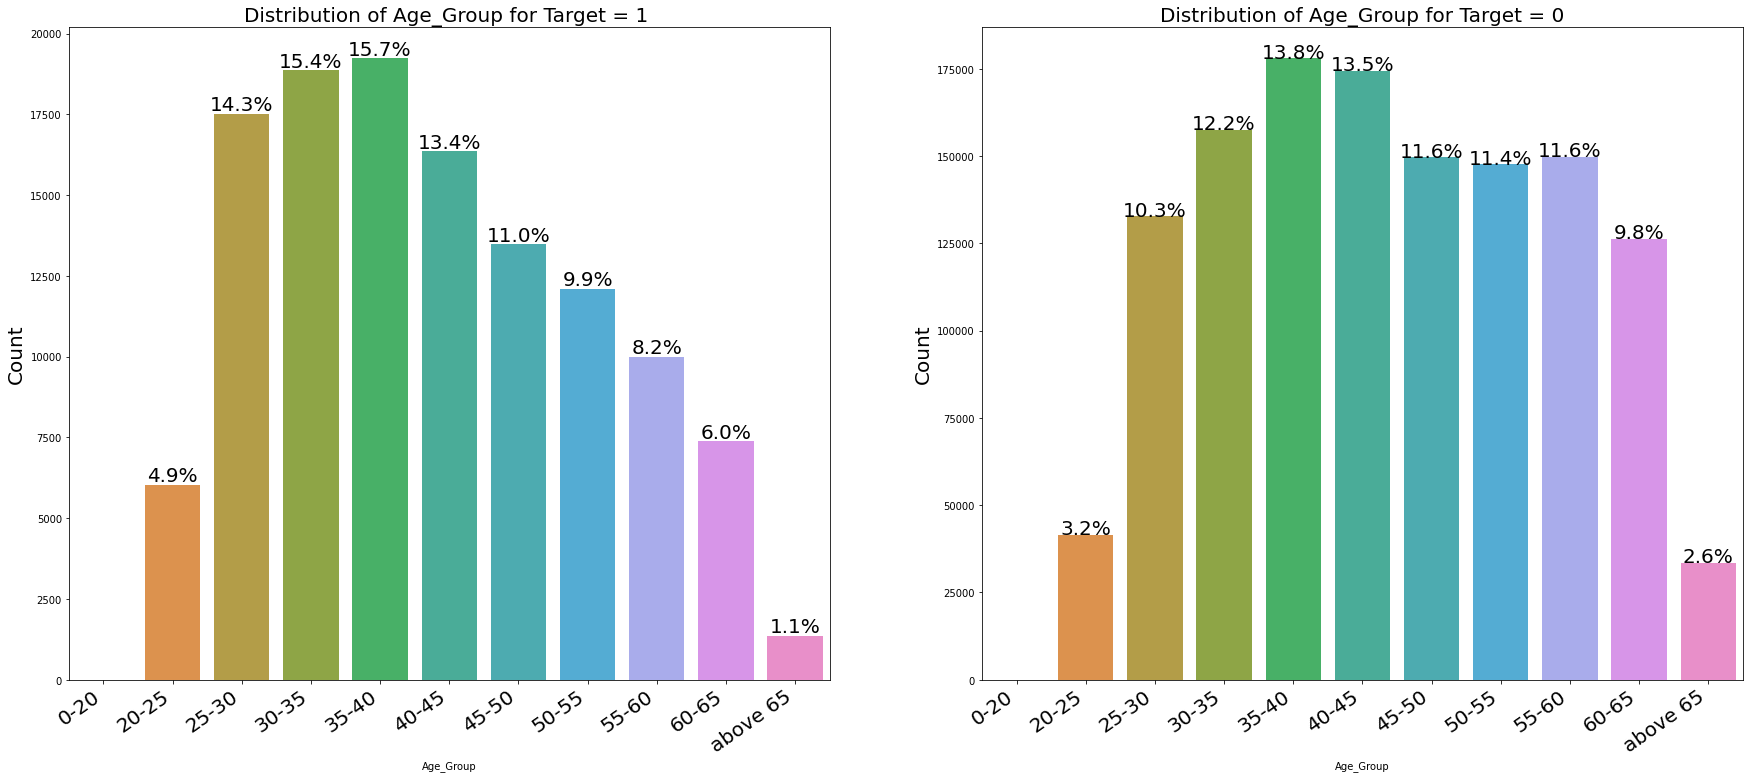

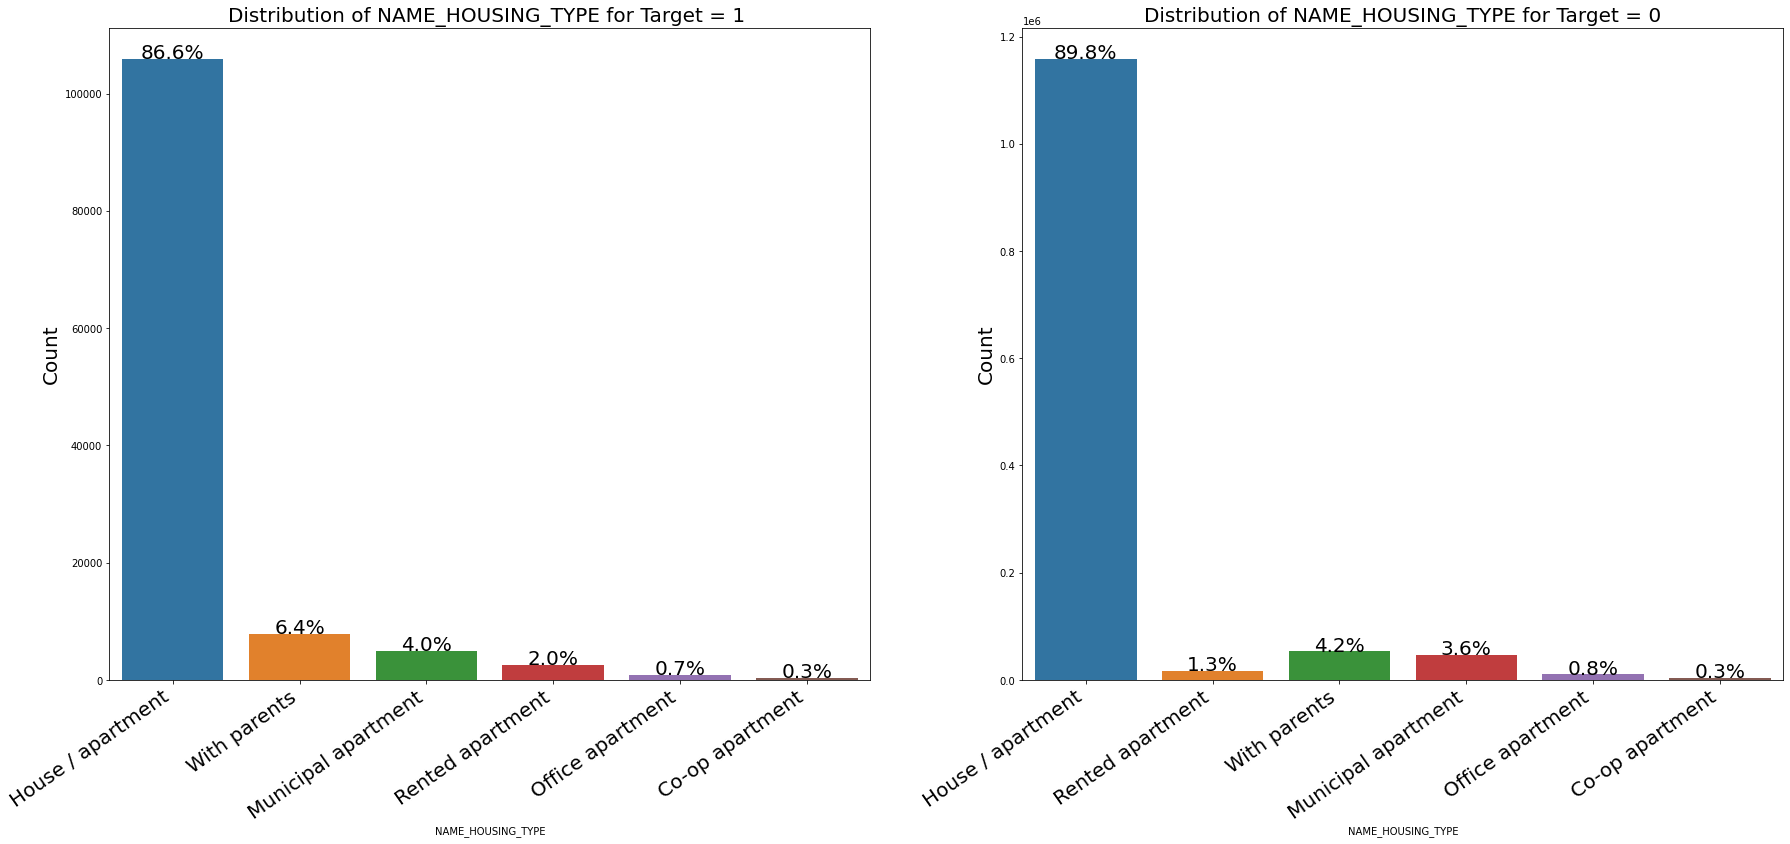

In [195]:
for x in merged_cat_cols:
    target_with_cat_merged(x)

### Insights:
 * Labourers, Sales Staff and Drivers make vast majority of defaulters
 * Comparatively,more defaulters live in rented apartments or with parents than non defaulters
 * Old age people(60+) tend to default less
 * male/female ratio is more in case of defaulters, 

### From the entire analysis, we can conclude some driving variables, that helps determine whether an applicant has chances of default

### Driving Variables
 * NAME_INCOME_TYPE
 * NAME_EDUCATION_TYPE
 * NAME_HOUSING_TYPE
 * AMT_INCOME_TOTAL
 * AMT_ANNUITY
 * AMT_CREDIT
 * DAYS_EMPLOYED
 * DAYS_BIRTH
 * CODE_GENDER


### With the patterns identified through this analysis, few recomendations can be followed:
**What Banks should look forward to do :**
 * Encourage loans to the elderly, they have less chances of default. 
 * Give loans to applicants with high AMT_INCOME_TOTAL and who also OWN_REALITY, they have less chances of default
 * Should give loans to widows, they have less chances of default
 * Should give loans to student with above average AMT_INCOME_TOTAL  
 * Should give loans to businessmen
 
**What Banks should Avoid :**
 * Avoid giving loans to labourers with below average AMT_INCOME_TOTAL
 * Avoid giving loans to applicants having Academic Degree at younger age, they have high chances of default
 * Avoid providing loans to applicants who are on maternity leave and have low income total, there are high chances of default in such cases
 * Avoid giving loans to applicants having a car but less AMT_INCOME_TOTAL
 * Avoid giving loans to students with low AMT_INCOME_TOTAL